In [1]:
%%time

%run dataframes.ipynb

Wall time: 4min 10s


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 20})

In [4]:
infections

,date,province,district,infected_total,population,area_ha,density_ppl_per_ha,new_infected,beds_10k,pandemic_day,infected_mean,new_infected_mean,infected_in_wave,scnd_wave_day,new_infected_mean_per_capita,infected_in_wave_mean
0,2020-03-04,dolnośląskie,bolesławiecki,0.0,90103,130351,0.691234,NaN,21.25,-44,NaN,NaN,0.0,-351,NaN,NaN
1,2020-03-05,dolnośląskie,bolesławiecki,0.0,90103,130351,0.691234,0.0,21.25,-43,NaN,NaN,0.0,-350,NaN,NaN
2,2020-03-06,dolnośląskie,bolesławiecki,0.0,90103,130351,0.691234,0.0,21.25,-42,NaN,NaN,0.0,-349,NaN,NaN
3,2020-03-07,dolnośląskie,bolesławiecki,0.0,90103,130351,0.691234,0.0,21.25,-41,0.000000,NaN,0.0,-348,NaN,0.000000
4,2020-03-08,dolnośląskie,bolesławiecki,0.0,90103,130351,0.691234,0.0,21.25,-40,0.000000,NaN,0.0,-347,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264314,2022-02-02,świętokrzyskie,włoszczowski,3561.0,45059,90786,0.496321,51.0,62.41,612,3557.285714,NaN,2471.0,345,NaN,2466.142857
264315,2022-02-03,świętokrzyskie,włoszczowski,3589.0,45059,90786,0.496321,28.0,62.41,613,3584.142857,NaN,2499.0,346,NaN,2493.000000
264316,2022-02-04,świętokrzyskie,włoszczowski,3626.0,45059,90786,0.496321,37.0,62.41,614,NaN,NaN,2536.0,347,NaN,NaN
264317,2022-02-05,świętokrzyskie,włoszczowski,3648.0,45059,90786,0.496321,22.0,62.41,615,NaN,NaN,2558.0,348,NaN,NaN


In [5]:
# #Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
# #skala lin-lin, y = ax + b

# pandemic_day_num = 400
# x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'population']
# y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total'] #, 'infected_mean']

# a, b, a_err, R2, p, S = fit_n_plot_linlin_statsmodels_intercept(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń")
# print("slope = "+str(a))
# print("slope error = "+str(a_err))
# print("intercept = "+str(b))
# print("R^2 = "+str(R2))
# print("p = "+str(p))
# print("S = "+str(S))

slope = 0.0806060106096349
slope error = 0.0006652785425162963
intercept = 0
R^2 = 0.9769083236202574
p = 4.966253067544529e-286
S = 1946.9811858402124
S_śr = 0.2685798938809852
S_med = 0.3973836485029518


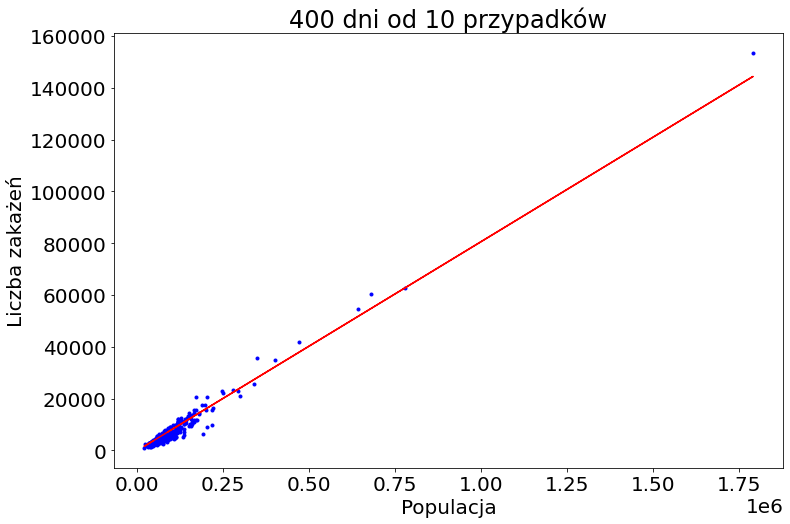

In [6]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin, y = ax

pandemic_day_num = 400
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total'] #, 'infected_mean']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń")
print("slope = "+str(a))
print("slope error = "+str(a_err))
print("intercept = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

ssr_lin = 0.0038276303148596404
df_resid_lin = 355.0
S_lin_med = 6.102012646956573
ssr_pow = 0.0029751144069253815
df_resid_pow = 354
ssr_log = 0.0034241819150776696
df_resid_log = 354.0


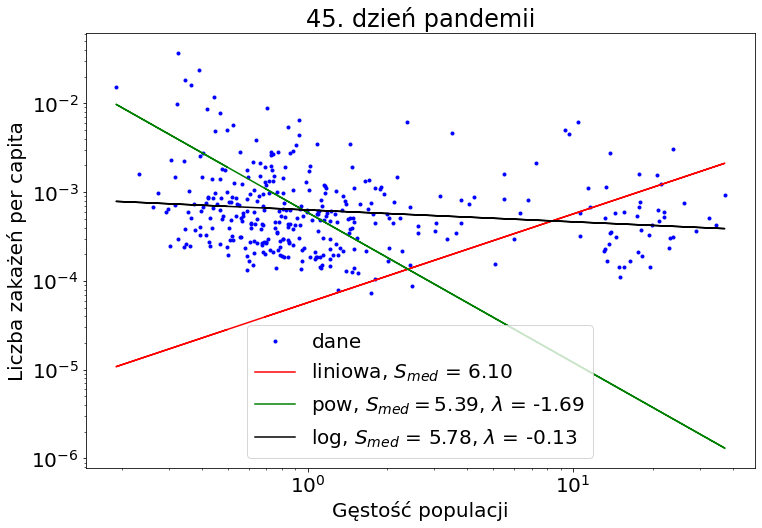

In [7]:
pandemic_day_num = 45
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']

lmbda, B, lmbda_err, R2_lin, R2_log, S_lin, S_log, S_lin_div, S_log_div, S_lin_med, S_log_med = fit_n_plot_lin_n_log_n_pow(x, y,
                              "45. dzień pandemii", 
                              "Gęstość populacji", "Liczba zakażeń per capita")

(-0.1338340649571076,
 -3.199970515447856,
 0.04557958505637117,
 0.01514022778473656,
 0.02377600160356208,
 0.003283604303955751,
 0.003110117404308234,
 2.5452723959659282,
 2.4107947379233385,
 6.102012646956573,
 5.779617145630448)

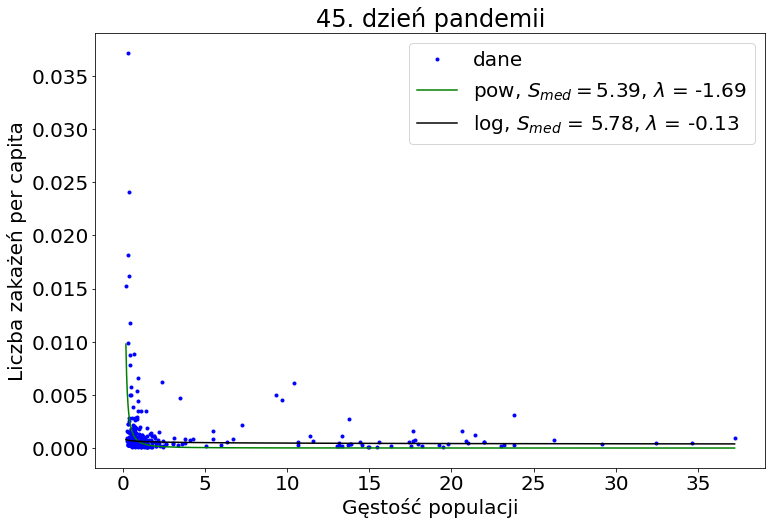

In [8]:
pandemic_day_num = 45
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']

fit_n_plot_lin_n_log_n_pow_plotlin(x, y,
                              "45. dzień pandemii", 
                              "Gęstość populacji", "Liczba zakażeń per capita")

slope = 0.0015308069559828922
slope error = 4.6702530805365876e-05
intercept = 0
R^2 = 0.9446097951483746
p = 2.6956773064735044e-41
S = 119.33542959530915
S_śr = 0.33725459216196174
S_med = 0.47355329204487756


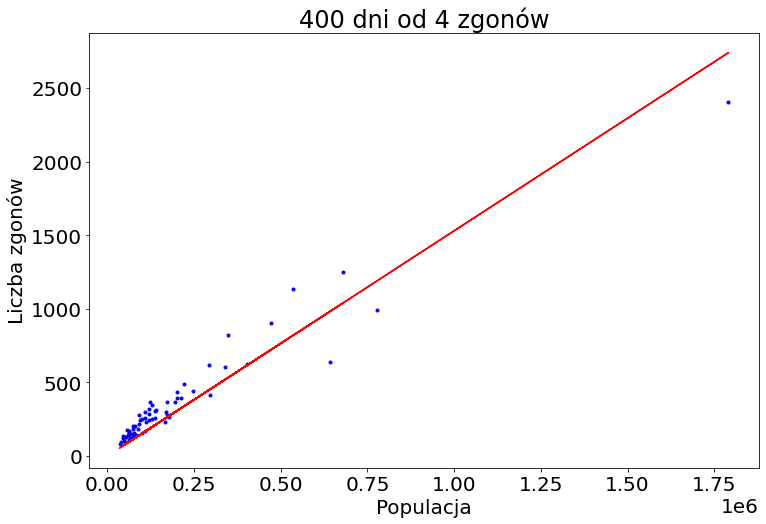

In [9]:
#Wykres całkowitej liczby śmierci od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = deaths_cities.loc[deaths_cities['pandemic_day'] == pandemic_day_num, 'population']
y = deaths_cities.loc[deaths_cities['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(x, y, str(pandemic_day_num)+" dni od 4 zgonów", "Populacja", "Liczba zgonów")
print("slope = "+str(a))
print("slope error = "+str(a_err))
print("intercept = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

In [88]:
%run funkcje.ipynb

exponent = 0.8217436208369658
exponent error = 0.03382463212712892
B = -0.5579570461359307
R^2 = 0.6290808853564936
p = 6.100141820439558e-77
S = 0.0006094178219118423
S_śr = 1.182285492294893
S_med = 1.5113764800419356


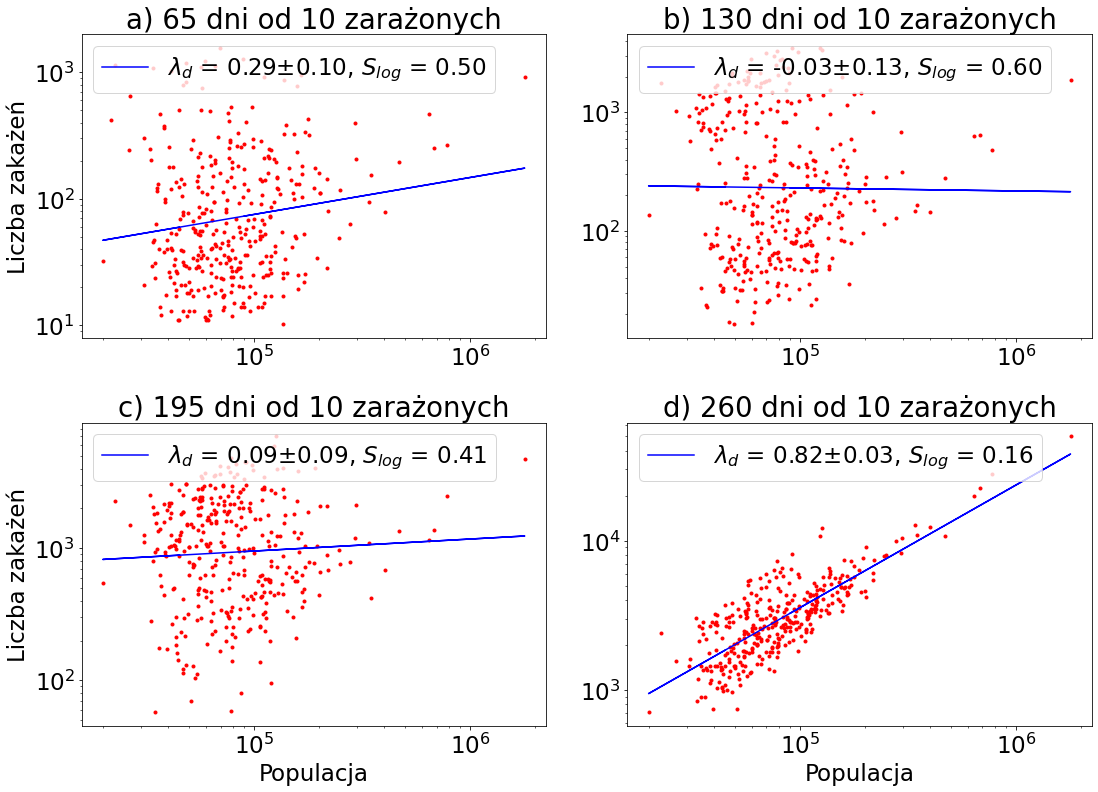

In [79]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 65
pandemic_day_num2 = 130
pandemic_day_num3 = 195
pandemic_day_num4 = 260

x1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'population']
y1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'infected_mean']
x2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'population']
y2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'infected_mean']
x3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'population']
y3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'infected_mean']
x4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'population']
y4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'infected_mean']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels_x4_nans_fix_new(x1, y1, x2, y2, x3, y3, x4, y4, "a) "+str(pandemic_day_num1)+" dni od 10 zarażonych", "b) "+str(pandemic_day_num2)+" dni od 10 zarażonych", "c) "+str(pandemic_day_num3)+" dni od 10 zarażonych", "d) "+str(pandemic_day_num4)+" dni od 10 zarażonych", "Populacja", "Liczba zakażeń")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

plt.savefig("inf_pop_"+str(pandemic_day_num1)+"_days.pdf")

exponent = 0.8217436208369658
exponent error = 0.03382463212712892
B = -0.5579570461359307
R^2 = 0.6290808853564936
p = 6.100141820439558e-77
S = 1519.42069947468
S_śr = 0.33725459216196174
S_med = 0.47355329204487756


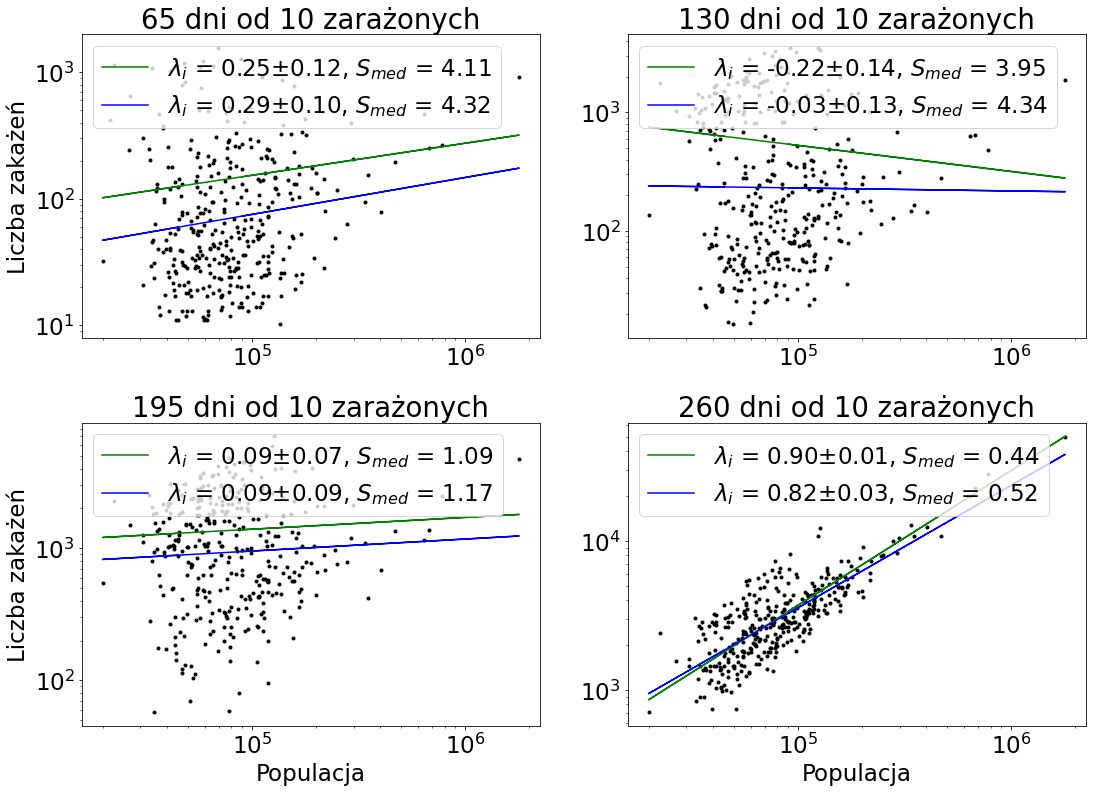

In [12]:
#Wykres całkowitej liczby przypadków od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 65
pandemic_day_num2 = 130
pandemic_day_num3 = 195
pandemic_day_num4 = 260

x1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'population']
y1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'infected_mean']
x2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'population']
y2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'infected_mean']
x3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'population']
y3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'infected_mean']
x4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'population']
y4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'infected_mean']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_n_pow_x4(x1, y1, x2, y2, x3, y3, x4, y4, str(pandemic_day_num1)+" dni od 10 zarażonych", str(pandemic_day_num2)+" dni od 10 zarażonych", str(pandemic_day_num3)+" dni od 10 zarażonych", str(pandemic_day_num4)+" dni od 10 zarażonych", "Populacja", "Liczba zakażeń")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

#plt.savefig("inf_pop_"+str(pandemic_day_num1)+"_days.pdf")

exponent = 0.07683340497747569
exponent error = 0.09482236260297974
B = 1.3510629298118495
R^2 = 0.0019560658377461015
p = 0.4183499995514329
S = 0.0006094178219118423
S_śr = 1.182285492294893
S_med = 1.5113764800419356


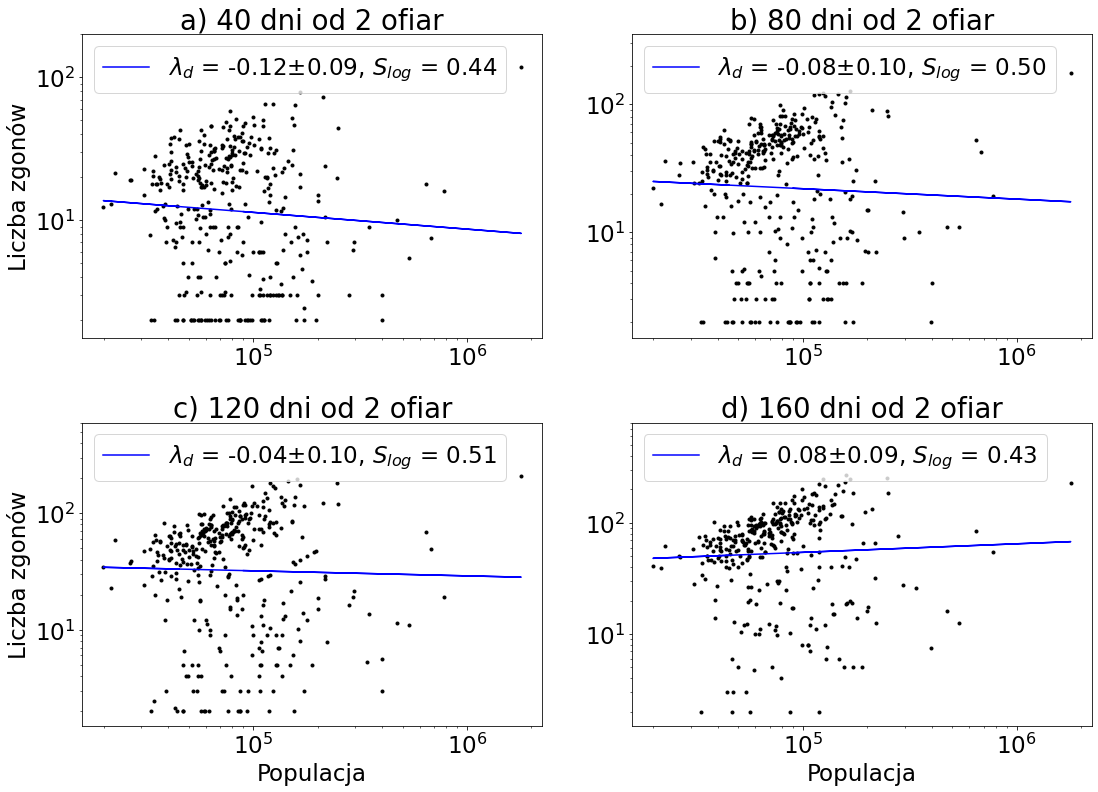

In [89]:
#Wykres całkowitej liczby zgonów od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 40
pandemic_day_num2 = 80
pandemic_day_num3 = 120
pandemic_day_num4 = 160

x1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'population']
y1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'dead_mean']
x2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'population']
y2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'dead_mean']
x3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'population']
y3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'dead_mean']
x4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'population']
y4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'dead_mean']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels_x4_nans_fix_new(x1, y1, x2, y2, x3, y3, x4, y4, "a) "+str(pandemic_day_num1)+" dni od 2 ofiar", "b) "+str(pandemic_day_num2)+" dni od 2 ofiar", "c) "+str(pandemic_day_num3)+" dni od 2 ofiar", "d) "+str(pandemic_day_num4)+" dni od 2 ofiar", "Populacja", "Liczba zgonów")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

plt.savefig("dead_pop_"+str(pandemic_day_num1)+"_days.pdf")

exponent = 0.07683340497747569
exponent error = 0.09482236260297974
B = 1.3510629298118495
R^2 = 0.0019560658377461015
p = 0.4183499995514329
S = 55.60467230246203
S_śr = 0.33725459216196174
S_med = 0.47355329204487756


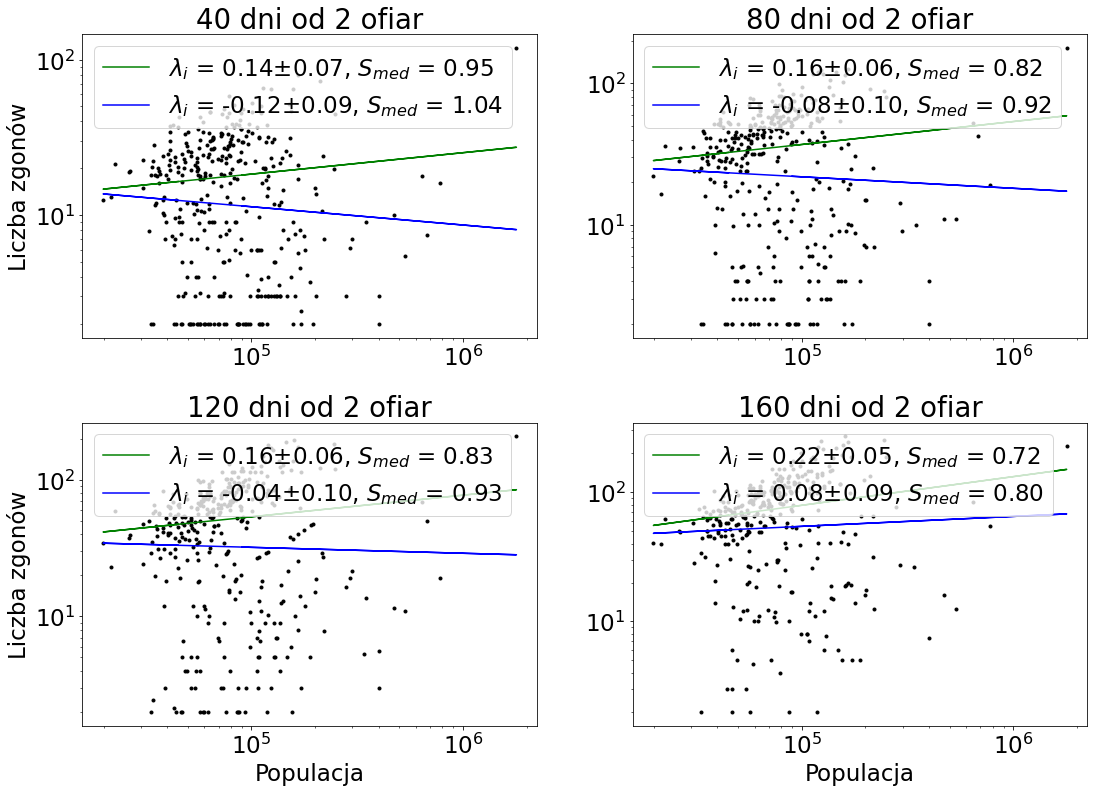

In [14]:
#Wykres całkowitej liczby zgonów od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 40
pandemic_day_num2 = 80
pandemic_day_num3 = 120
pandemic_day_num4 = 160

x1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'population']
y1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'dead_mean']
x2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'population']
y2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'dead_mean']
x3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'population']
y3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'dead_mean']
x4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'population']
y4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'dead_mean']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_n_pow_x4(x1, y1, x2, y2, x3, y3, x4, y4, str(pandemic_day_num1)+" dni od 2 ofiar", str(pandemic_day_num2)+" dni od 2 ofiar", str(pandemic_day_num3)+" dni od 2 ofiar", str(pandemic_day_num4)+" dni od 2 ofiar", "Populacja", "Liczba zgonów")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

#plt.savefig("dead_pop_"+str(pandemic_day_num1)+"_days.pdf")

exponent = -0.061786856019056285
exponent error = 0.01673029372726414
B = -1.424600722625003
R^2 = 0.03771461748214611
p = 0.0002571249668801511
S = 0.0006094178219118423
S_śr = 1.182285492294893
S_med = 1.5113764800419356


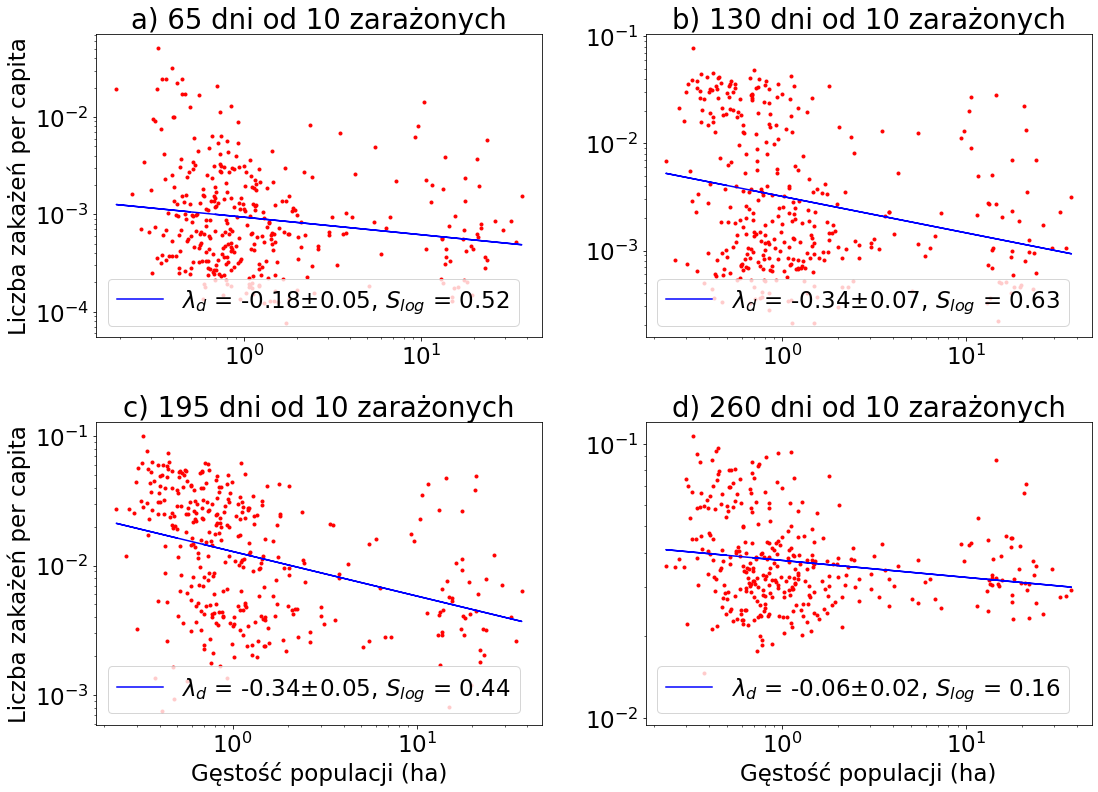

In [76]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 65
pandemic_day_num2 = 130
pandemic_day_num3 = 195
pandemic_day_num4 = 260

x1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'density_ppl_per_ha']
y1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'population']
x2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'density_ppl_per_ha']
y2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'population']
x3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'density_ppl_per_ha']
y3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'population']
x4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'density_ppl_per_ha']
y4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'population']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels_x4_nans_fix_new(x1, y1, x2, y2, x3, y3, x4, y4, "a) "+str(pandemic_day_num1)+" dni od 10 zarażonych", "b) "+str(pandemic_day_num2)+" dni od 10 zarażonych", "c) "+str(pandemic_day_num3)+" dni od 10 zarażonych", "d) "+str(pandemic_day_num4)+" dni od 10 zarażonych", "Gęstość populacji (ha)", "Liczba zakażeń per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

plt.savefig("inf_dens_"+str(pandemic_day_num1)+"_days.pdf")

exponent = -0.25943536807666956
exponent error = 0.05983938302571061
B = -2.846643188540346
R^2 = 0.05042105891694082
p = 1.8979774694768864e-05
S = 0.007524292236364366
S_śr = 0.33725459216196174
S_med = 0.47355329204487756


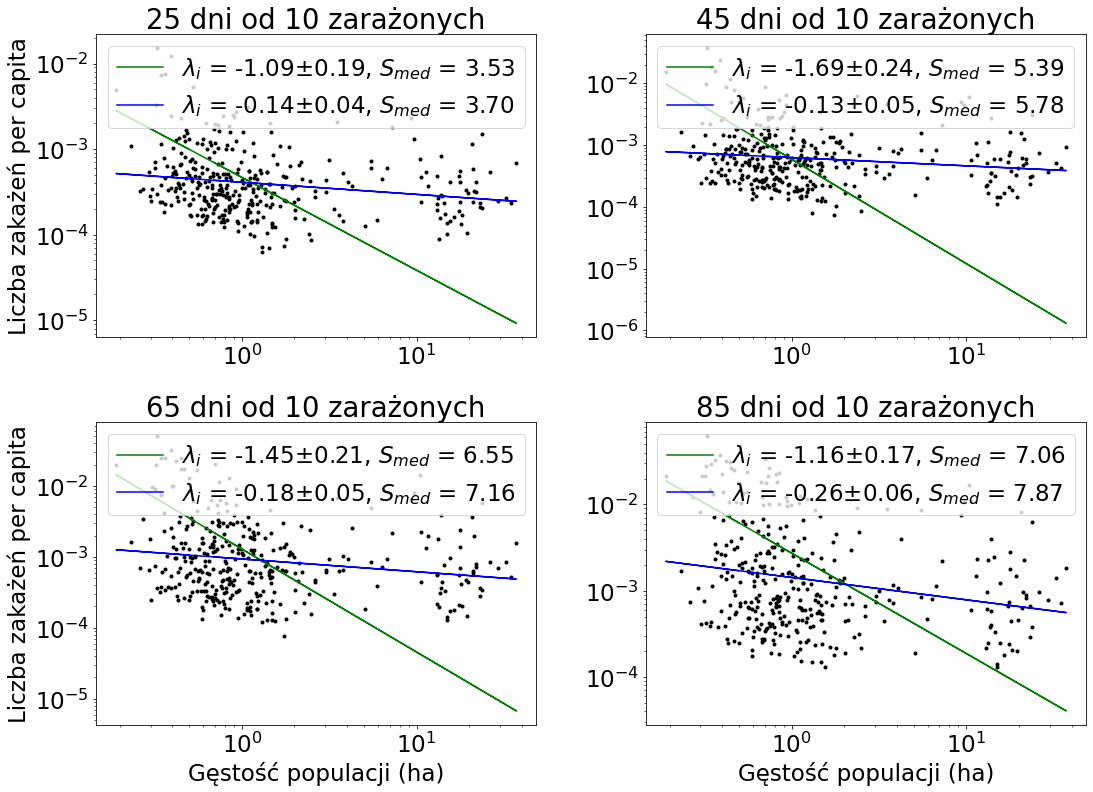

In [16]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 25
pandemic_day_num2 = 45
pandemic_day_num3 = 65
pandemic_day_num4 = 85

x1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'density_ppl_per_ha']
y1 = infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num1, 'population']
x2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'density_ppl_per_ha']
y2 = infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num2, 'population']
x3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'density_ppl_per_ha']
y3 = infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num3, 'population']
x4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'density_ppl_per_ha']
y4 = infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'infected_mean'] / infections.loc[infections['pandemic_day'] == pandemic_day_num4, 'population']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_n_pow_x4(x1, y1, x2, y2, x3, y3, x4, y4, str(pandemic_day_num1)+" dni od 10 zarażonych", str(pandemic_day_num2)+" dni od 10 zarażonych", str(pandemic_day_num3)+" dni od 10 zarażonych", str(pandemic_day_num4)+" dni od 10 zarażonych", "Gęstość populacji (ha)", "Liczba zakażeń per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

#plt.savefig("inf_dens_"+str(pandemic_day_num1)+"_days.pdf")

In [68]:
%run funkcje.ipynb

exponent = -0.38769494838603463
exponent error = 0.046661768266112576
B = -3.1197331876416747
R^2 = 0.17086018188207108
p = 2.4371397670700468e-15
S = 0.0006094178219118423
S_śr = 1.182285492294893
S_med = 1.5113764800419356


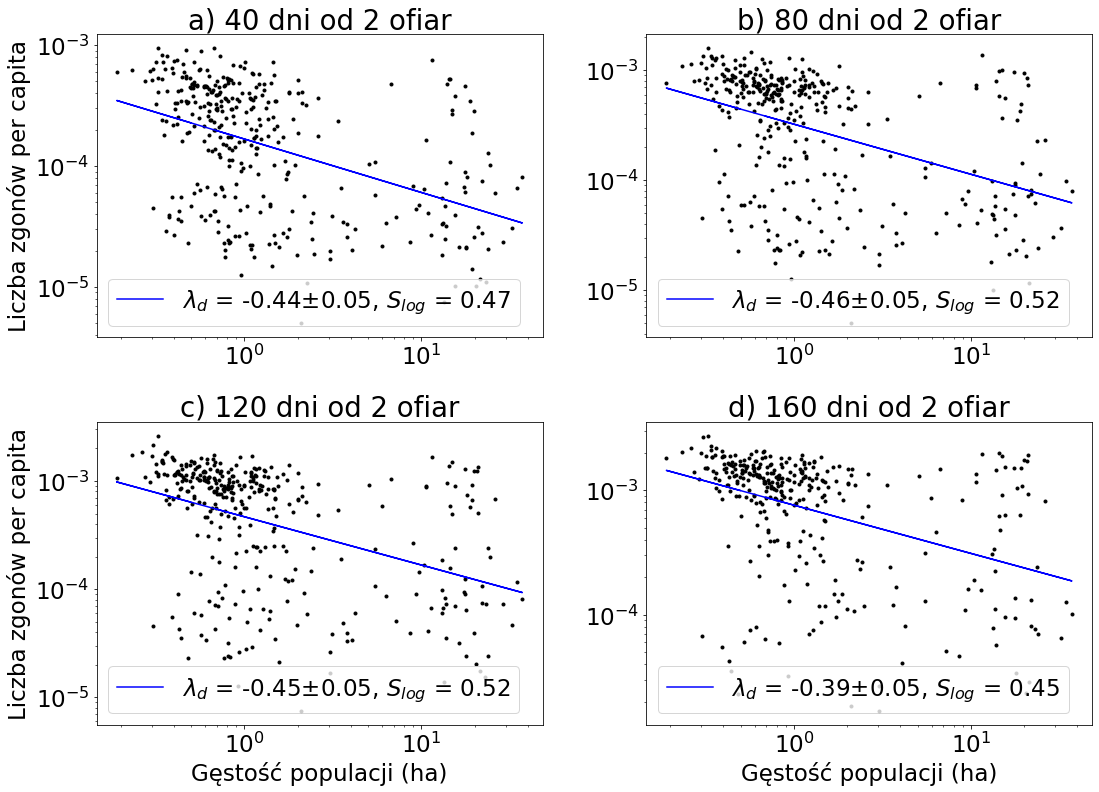

In [69]:
#Wykres całkowitej liczby zgonów od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 40
pandemic_day_num2 = 80
pandemic_day_num3 = 120
pandemic_day_num4 = 160

x1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'density_ppl_per_ha']
y1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'population']
x2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'density_ppl_per_ha']
y2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'population']
x3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'density_ppl_per_ha']
y3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'population']
x4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'density_ppl_per_ha']
y4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'population']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels_x4_nans_fix_new(x1, y1, x2, y2, x3, y3, x4, y4, "a) "+str(pandemic_day_num1)+" dni od 2 ofiar", "b) "+str(pandemic_day_num2)+" dni od 2 ofiar", "c) "+str(pandemic_day_num3)+" dni od 2 ofiar", "d) "+str(pandemic_day_num4)+" dni od 2 ofiar", "Gęstość populacji (ha)", "Liczba zgonów per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

plt.savefig("dead_dens_"+str(pandemic_day_num1)+"_days.pdf")

exponent = -0.38769494838603463
exponent error = 0.046661768266112576
B = -3.1197331876416747
R^2 = 0.17086018188207108
p = 2.4371397670700468e-15
S = 0.0006094178219118423
S_śr = 0.33725459216196174
S_med = 0.47355329204487756


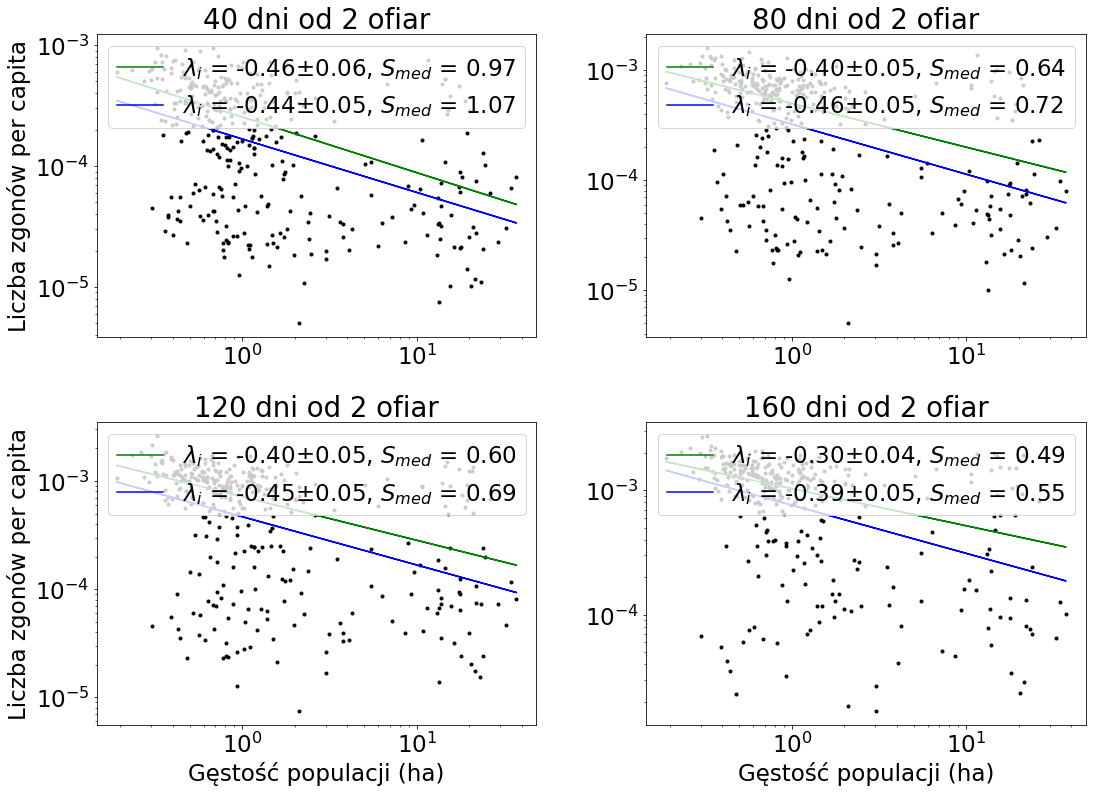

In [19]:
#Wykres całkowitej liczby zgonów od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

plt.rcParams["figure.figsize"] = (16,11.5)
#plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 23})

pandemic_day_num1 = 40
pandemic_day_num2 = 80
pandemic_day_num3 = 120
pandemic_day_num4 = 160

x1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'density_ppl_per_ha']
y1 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num1, 'population']
x2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'density_ppl_per_ha']
y2 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num2, 'population']
x3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'density_ppl_per_ha']
y3 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num3, 'population']
x4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'density_ppl_per_ha']
y4 = deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == pandemic_day_num4, 'population']


a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_n_pow_x4(x1, y1, x2, y2, x3, y3, x4, y4, str(pandemic_day_num1)+" dni od 2 ofiar", str(pandemic_day_num2)+" dni od 2 ofiar", str(pandemic_day_num3)+" dni od 2 ofiar", str(pandemic_day_num4)+" dni od 2 ofiar", "Gęstość populacji (ha)", "Liczba zgonów per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

#plt.savefig("dead_dens_"+str(pandemic_day_num1)+"_days.pdf")

In [20]:
dti = pd.date_range("2020-11-23", periods=7, freq="7D")

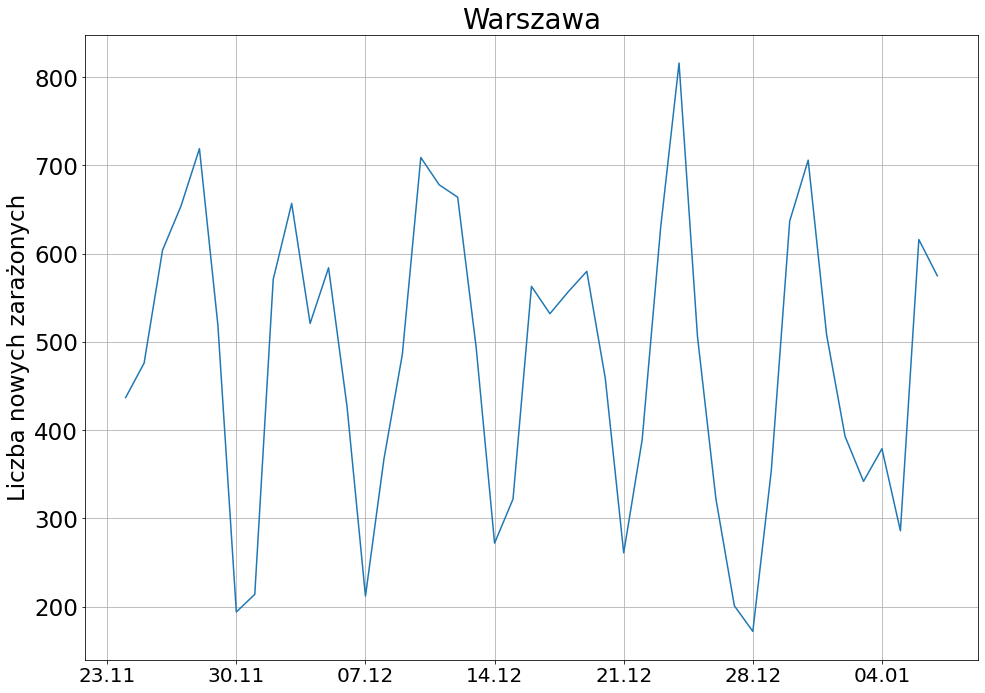

In [21]:
# Tygodniowe wahania nowych zarażonych
# Na osi x zaznaczone poniedziałki
fig, ax = plt.subplots()
x = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-23') & (infections['date'] < '2021-01-08'), 'date']
y = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-23') & (infections['date'] < '2021-01-08') , 'new_infected']
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('Liczba nowych zarażonych')
plt.xticks(dti)
plt.grid(visible = True)
plt.title("Warszawa")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d.%m'))
ax.tick_params(axis='x', which='major', labelsize=20)

plt.savefig("week_warsaw_inf.pdf")

In [22]:
x = infections.loc[(infections['district'] == 'warszawa') & (infections['date'] > '2020-11-23') & (infections['date'] < '2021-01-08') , 'new_infected']
y = deaths.loc[(deaths['district'] == 'warszawa') & (deaths['date'] > '2020-11-23') & (deaths['date'] < '2021-01-08') , 'new_death']
print(x.sum())
print(y.sum())
print(x.sum()/y.sum())

21564.0
470.0
45.88085106382979


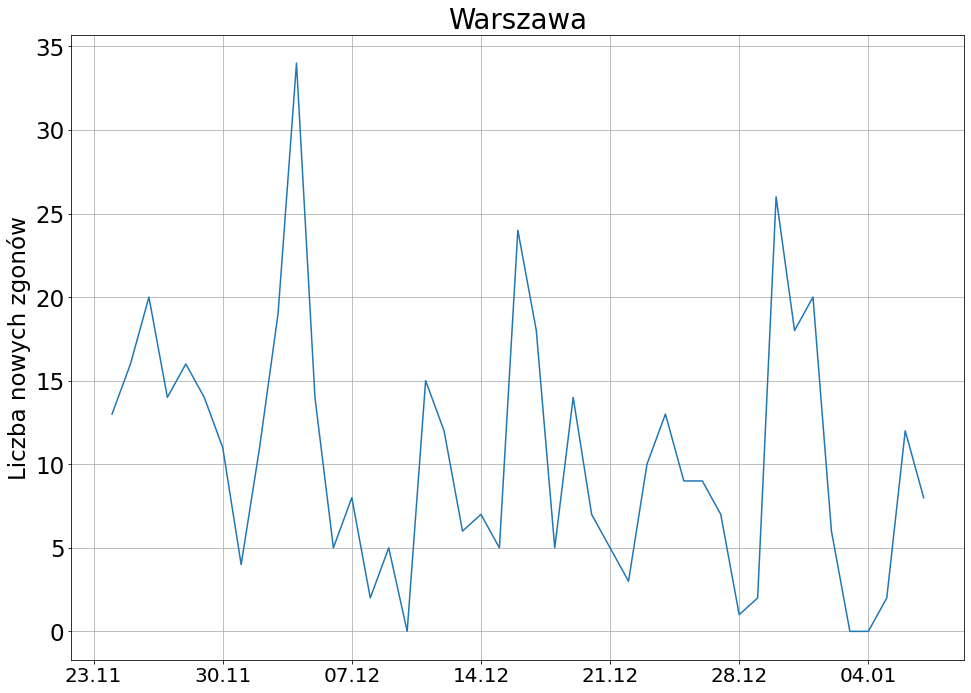

In [23]:
# Tygodniowe wahania nowych zarażonych
# Na osi x zaznaczone poniedziałki
fig, ax = plt.subplots()
x = deaths.loc[(deaths['district'] == 'warszawa') & (deaths['date'] > '2020-11-23') & (deaths['date'] < '2021-01-08'), 'date']
y = deaths.loc[(deaths['district'] == 'warszawa') & (deaths['date'] > '2020-11-23') & (deaths['date'] < '2021-01-08') , 'new_death']
plt.plot(x, y)
plt.xlabel('')
plt.ylabel('Liczba nowych zgonów')
plt.xticks(dti)
plt.grid(visible = True)
plt.title("Warszawa")
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d.%m'))
ax.tick_params(axis='x', which='major', labelsize=20)

plt.savefig("week_warsaw_dead.pdf")

exponent = 0.5212173359702589
exponent error = 0.04276430067352176
B = -0.5465180418150416
R^2 = 0.284280093612861
p = 5.277626344187839e-29
S = 60.06822806211059
S_śr = 0.5030468501720581
S_med = 0.5839966617149641


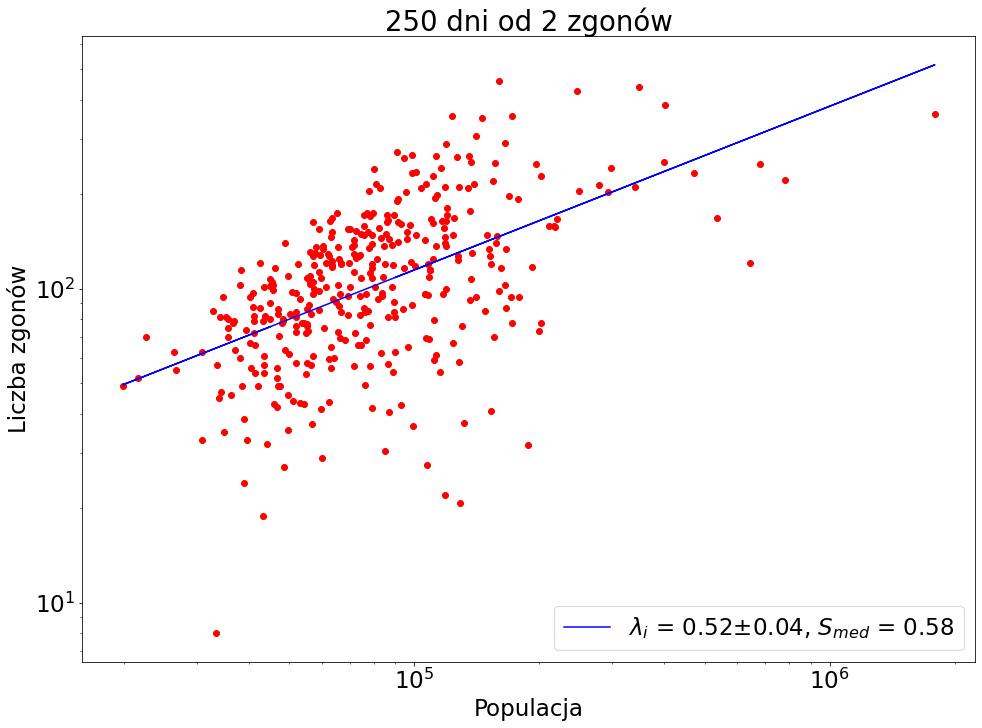

In [24]:
#Wykres całkowitej liczby śmierci od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 250
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_mean']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(x, y, str(pandemic_day_num)+" dni od 2 zgonów", "Populacja", "Liczba zgonów")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

#plt.savefig("dead_"+str(pandemic_day_num)+"_days.pdf")

slope = 1082.8410662792858
slope error = 162.42550940012785
intercept = 0
R^2 = 0.4608314833786643
p = 1.682491485133511e-08
S = 21522.482551367815
S_śr = 1.2685641056345638
S_med = 2.305321610043682


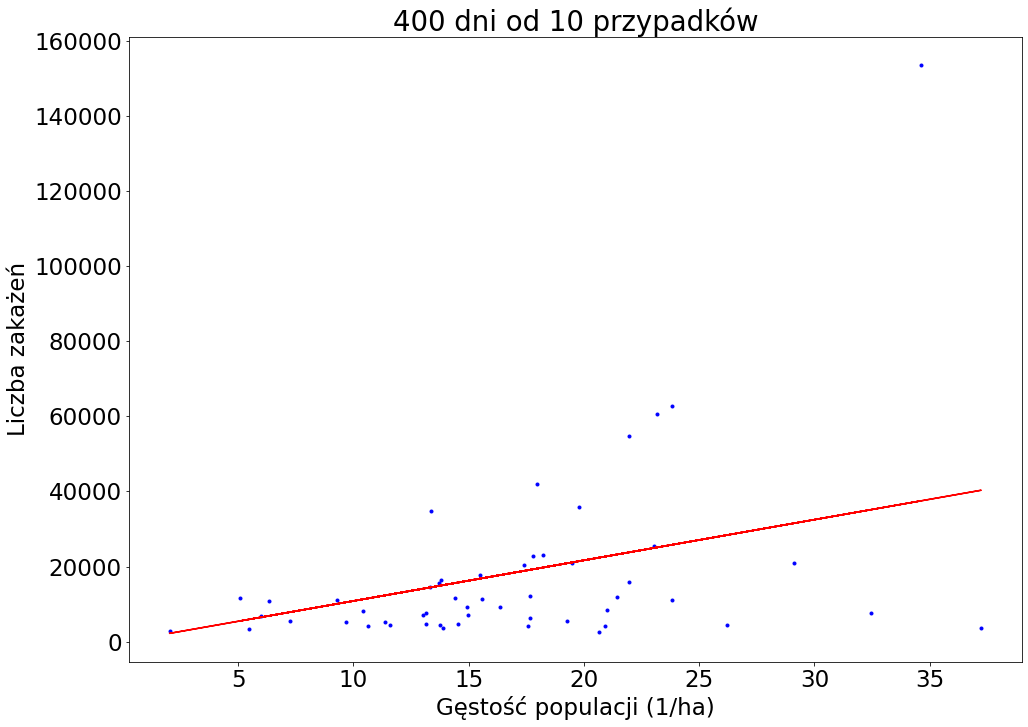

In [25]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń")
print("slope = "+str(a))
print("slope error = "+str(a_err))
print("intercept = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

slope = 23.886809106015413
slope error = 1.3462721249076712
intercept = 0
R^2 = 0.45637321617599746
p = 1.4207634941567238e-51
S = 194.47565593106827
S_śr = 1.011367016086661
S_med = 1.2669423839157543


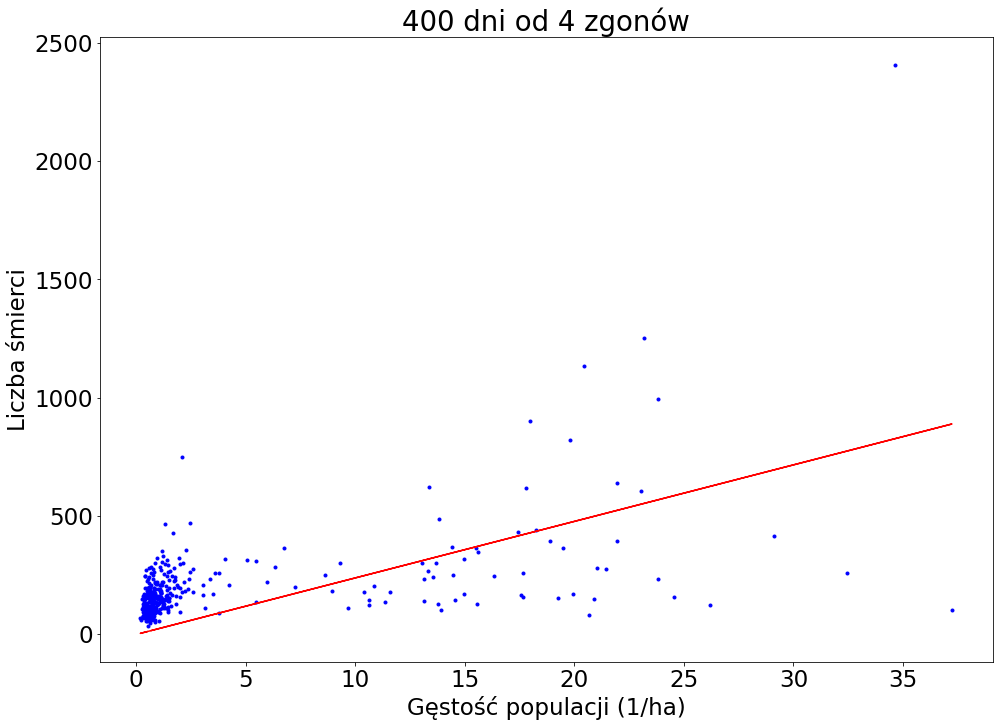

In [26]:
#Wykres całkowitej liczby śmierci od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(x, y, str(pandemic_day_num)+" dni od 4 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci")
print("slope = "+str(a))
print("slope error = "+str(a_err))
print("intercept = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

exponent = 0.6547221984978269
exponent error = 0.22048145615942985
B = 3.269391745426912
R^2 = 0.14741379313761904
p = 0.0045372183931515365
S = 24983.090746165948
S_śr = 1.4148327919993369
S_med = 2.5972648660116384


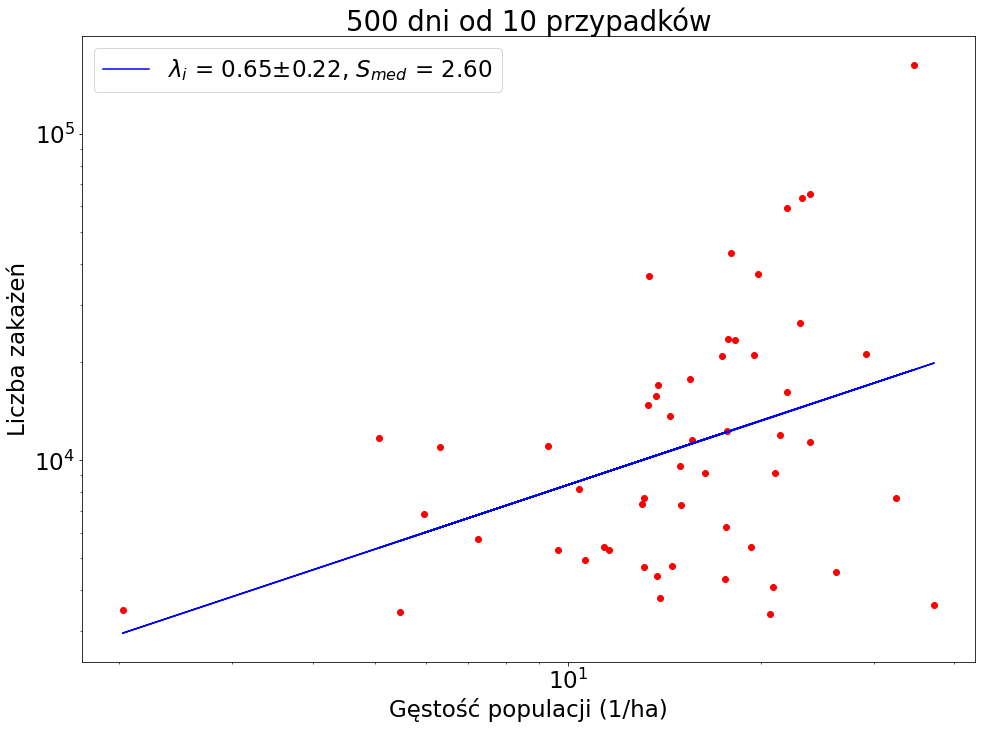

In [27]:
#Wykres całkowitej liczby przypadków od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 500
x = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = infections_cities.loc[infections_cities['pandemic_day'] == pandemic_day_num, 'infected_total']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

exponent = 0.2575946841440985
exponent error = 0.01921886139668281
B = 2.167369420898034
R^2 = 0.3244785664074894
p = 9.994623797370042e-34
S = 159.60842096640388
S_śr = 0.8300406119330004
S_med = 1.039794273396768


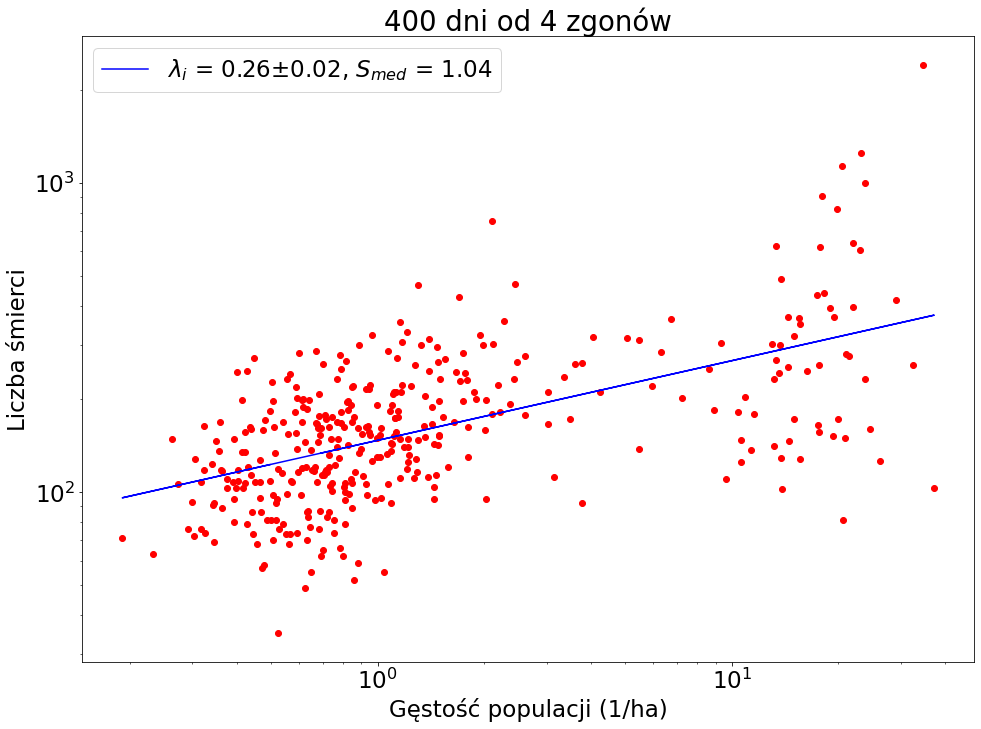

In [28]:
#Wykres całkowitej liczby śmierci od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 400
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
y = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(x, y, str(pandemic_day_num)+" dni od 4 zgonów", "Gęstość populacji (1/ha)", "Liczba śmierci")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

exponent = -0.29910714470638766
exponent error = 0.06383463472119355
B = -2.7332174442892447
R^2 = 0.05855462954686619
p = 3.989979455262086e-06
S = 0.00961261471851588
S_śr = 1.816118416582519
S_med = 7.494654235328559


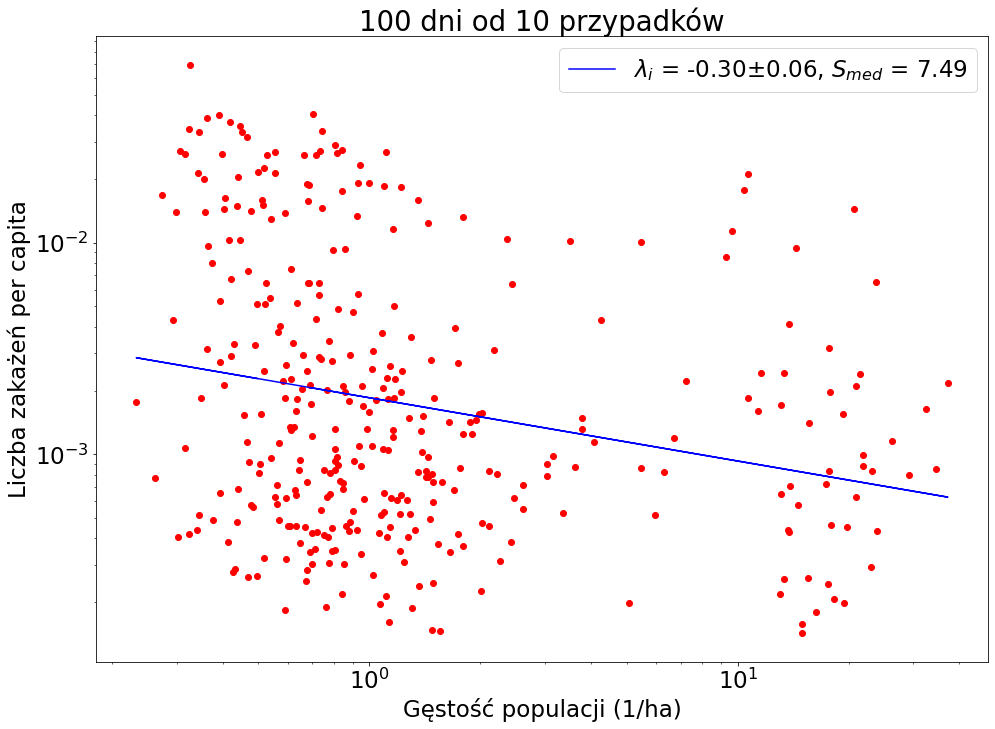

In [29]:
#Wykres całkowitej liczby zakażeń per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log
#plt.rcParams["figure.figsize"] = (12,8)
#plt.rcParams.update({'font.size': 25})

pandemic_day_num = 100
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
infectss = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infectss / popul

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Gęstość populacji (1/ha)", "Liczba zakażeń per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

slope = 2.945445718949552e-07
slope error = 1.810558224097408e-08
intercept = 0
R^2 = 0.43268500478698346
p = 1.2597068410900505e-44
S = 0.0529871711306482
S_śr = 0.7738722719900888
S_med = 0.7857100004513033


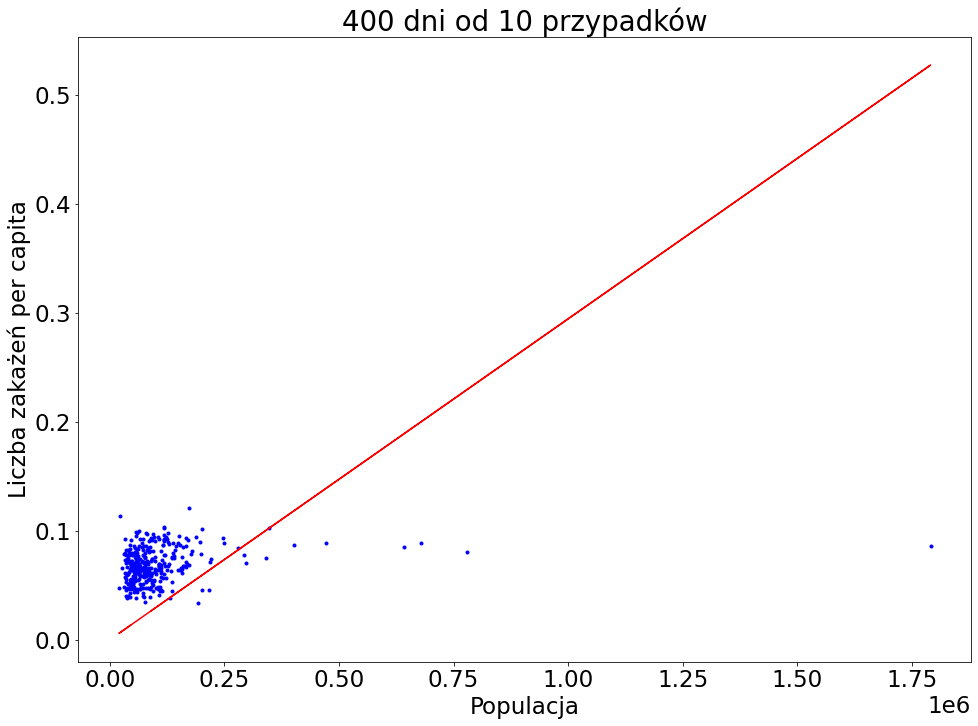

In [30]:
#Wykres całkowitej liczby zakażeń per capita od populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala lin-lin

pandemic_day_num = 400
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
infectss = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infectss / popul

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_linlin_statsmodels(x, y, str(pandemic_day_num)+" dni od 10 przypadków", "Populacja", "Liczba zakażeń per capita")
print("slope = "+str(a))
print("slope error = "+str(a_err))
print("intercept = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

exponent = 0.04640122057620252
exponent error = 0.011375171459488185
B = -1.1489015473345212
R^2 = 0.04691974863536186
p = 5.642322853464157e-05
S = 0.018616666967652747
S_śr = 0.25061211831359825
S_med = 0.26144530804464217


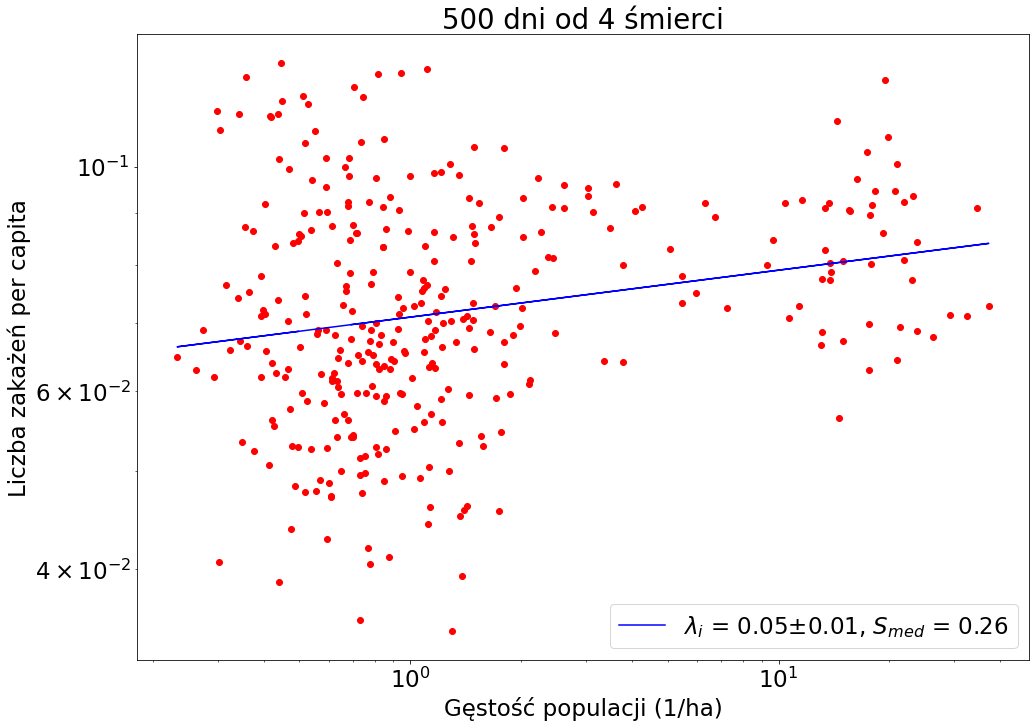

In [31]:
#Wykres całkowitej liczby zakażeń per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 500
x = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
infectionss = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'infected_total']
popul = infections.loc[infections['pandemic_day'] == pandemic_day_num, 'population']
y = infectionss / popul

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(x, y, str(pandemic_day_num)+" dni od 4 śmierci", "Gęstość populacji (1/ha)", "Liczba zakażeń per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

exponent = -0.025799806358759565
exponent error = 0.016103212918360522
B = -2.6559478156169964
R^2 = 0.012992527700741774
p = 0.11074048160828236
S = 0.0006574739742181916
S_śr = 0.2903439499335032
S_med = 0.3016892383363974


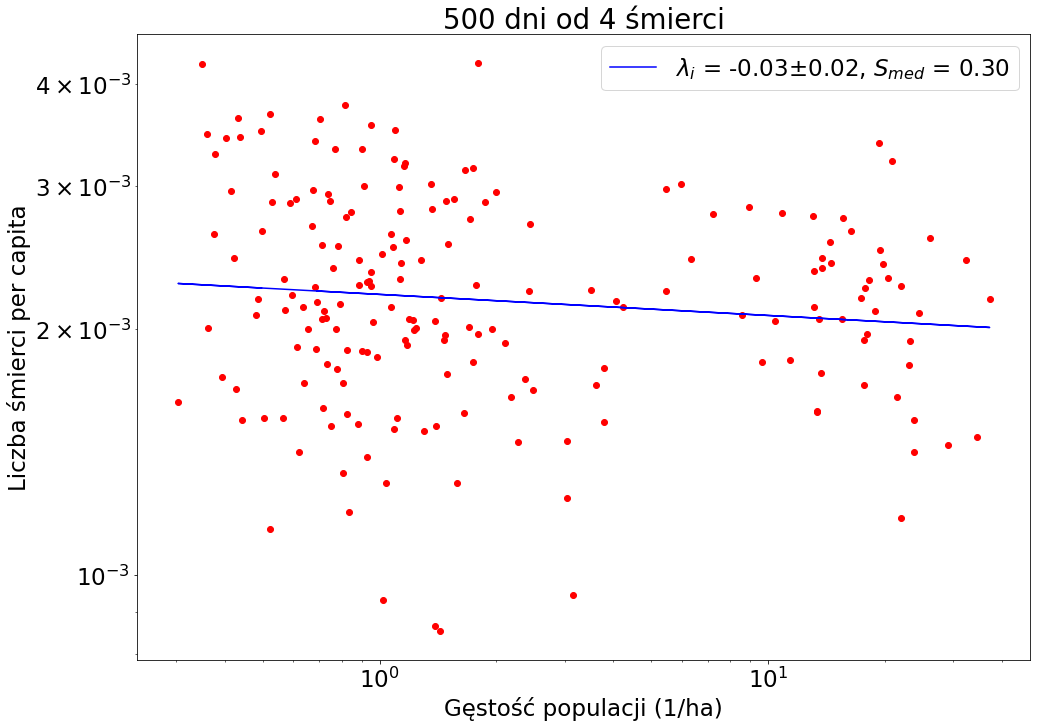

In [32]:
#Wykres całkowitej liczby śmierci per capita od gęstości populacji dla wybranego dnia pandemii razem z dopasowaniem
#skala log-log

pandemic_day_num = 500
x = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'density_ppl_per_ha']
deathss = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'dead_total']
popul = deaths.loc[deaths['pandemic_day'] == pandemic_day_num, 'population']
y = deathss / popul

a, b, a_err, R2, p, S, S_div, S_med = fit_n_plot_loglog_statsmodels(x, y, str(pandemic_day_num)+" dni od 4 śmierci", "Gęstość populacji (1/ha)", "Liczba śmierci per capita")
print("exponent = "+str(a))
print("exponent error = "+str(a_err))
print("B = "+str(b))
print("R^2 = "+str(R2))
print("p = "+str(p))
print("S = "+str(S))
print("S_śr = "+str(S_div))
print("S_med = "+str(S_med))

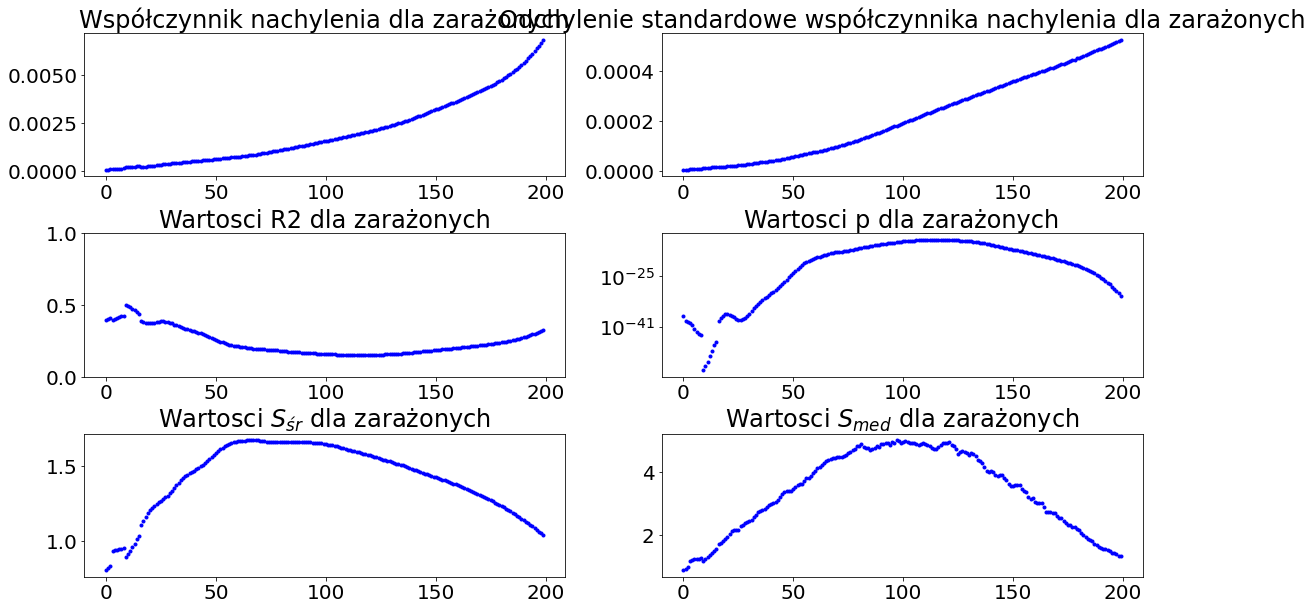

In [33]:
#Wykres nachylenia prostej y=ax dopasowanej do wykresu liczby całkowitych przypadków w zależności od dnia pandemicznego
#+ wykresy jakości dopasowania
#wykres lin-lin, populacja, infekcje, dane ze wszystkich powiatów

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 20})

days_num = 200
nachylenia = []
nachylenia_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_linlin_statsmodels(x, y)
    
    nachylenia.append(a)
    nachylenia_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)
    
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla zarażonych')
ax[0,1].plot(range(days_num), nachylenia_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe współczynnika nachylenia dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
#ax[1,0].set_position([0.2,0.402,0.318,0.2])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')


# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla zarażonych')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

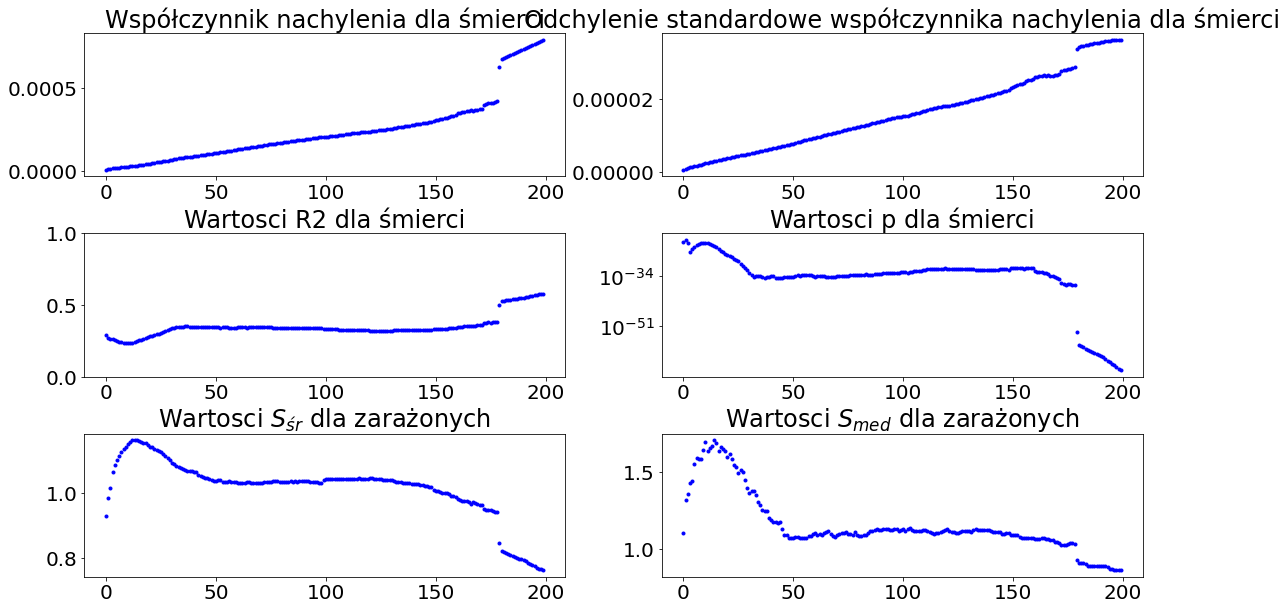

In [34]:
#Wykres nachylenia prostej y=ax dopasowanej do wykresu liczby całkowitych śmierci w zależności od dnia pandemicznego
#+ wykresy jakości dopasowania
#wykres lin-lin, populacja, śmierci, dane ze wszystkich powiatów

days_num = 200
nachylenia = []
nachylenia_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_linlin_statsmodels(x, y)
    
    nachylenia.append(a)
    nachylenia_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla śmierci')
ax[0,1].plot(range(days_num), nachylenia_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe współczynnika nachylenia dla śmierci')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla śmierci')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

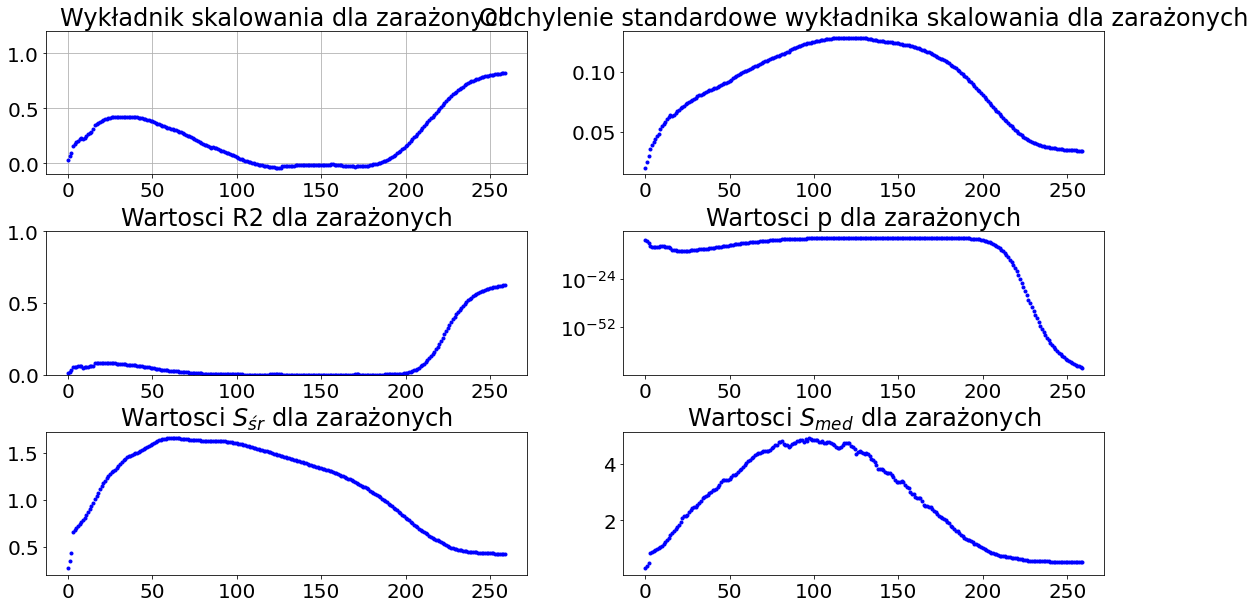

In [35]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, infekcje, dane ze wszystkich powiatów

days_num = 260
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,0].grid(visible = True)
ax[0,0].set_ylim([-0.1, 1.2])
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla zarażonych')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla zarażonych')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

In [36]:
%run funkcje.ipynb

0.428069793172159


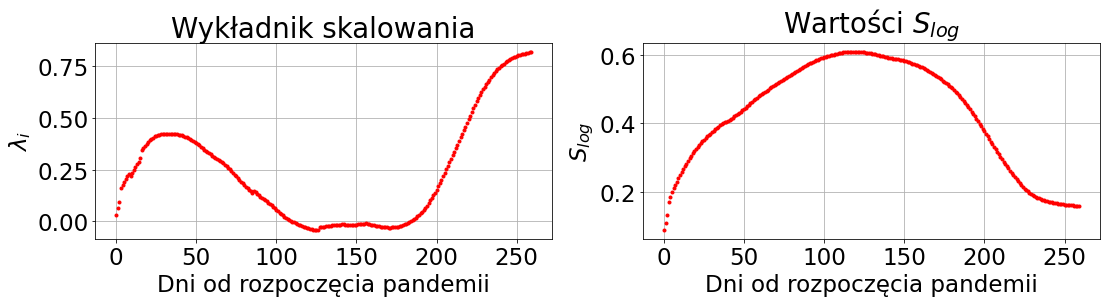

In [91]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, infekcje, dane ze wszystkich powiatów

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 23})

days_num = 260

wykladniki = []
wartosci_S_log = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    a, b, a_err, R2, p, S, S_div, S_log = fit_loglog_statsmodels_nans_fix_new(x, y)
    
    wykladniki.append(a)
    wartosci_S_log.append(S_log)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki, 'ro', markersize=3, label='a')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_i$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_log, 'ro', markersize=3, label='S_log')
ax[1].title.set_text('Wartości $S_{log}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{log}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

print(np.mean(wartosci_S_log))
#plt.savefig("inf_1wave_pop.pdf")

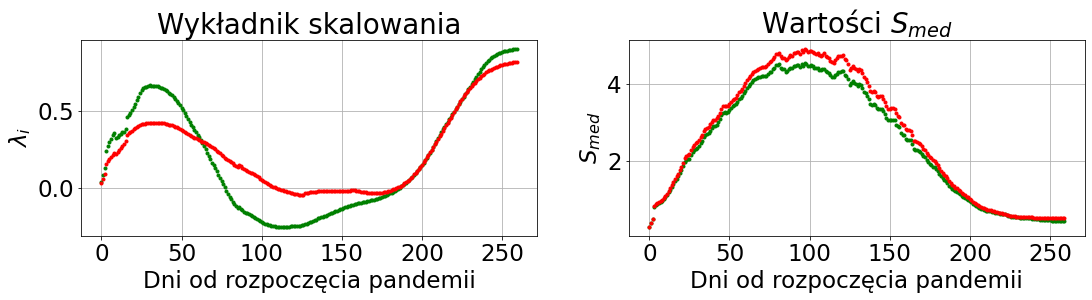

In [38]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, infekcje, dane ze wszystkich powiatów

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 23})

days_num = 260

wykladniki1 = []
wartosci_S_med1 = []
wykladniki2 = []
wartosci_S_med2 = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    a1, b1, S_med1 = fit_pow(x, y)
    a2, b2, a_err, R2, p, S, S_div, S_med2 = fit_loglog_statsmodels(x, y)
    
    wykladniki1.append(a1)
    wartosci_S_med1.append(S_med1)
    wykladniki2.append(a2)
    wartosci_S_med2.append(S_med2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki1, 'go', markersize=3, label='a')
ax[0].plot(range(days_num), wykladniki2, 'ro', markersize=3, label='b')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_i$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_med1, 'go', markersize=3, label='S_med')
ax[1].plot(range(days_num), wartosci_S_med2, 'ro', markersize=3, label='S_med2')
ax[1].title.set_text('Wartości $S_{med}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{med}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

#plt.savefig("inf_1wave_pop.pdf")

0.456473504808656


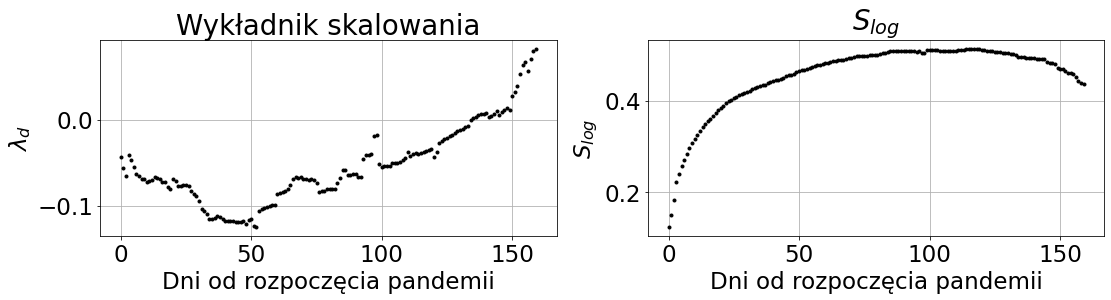

In [92]:
#Wykres wykładnika skalowania dla liczby całkowitych zgonów w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, śmierci, dane ze wszystkich powiatów

days_num = 160

wykladniki = []
wartosci_S_log = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    a, b, a_err, R2, p, S, S_div, S_log = fit_loglog_statsmodels_nans_fix_new(x, y)
    
    wykladniki.append(a)
    wartosci_S_log.append(S_log)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki, 'o', markersize=3, color = 'black', label='a')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_d$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_log, 'o', markersize=3, color = 'black', label='S_log')
ax[1].title.set_text('$S_{log}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{log}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

print(np.mean(wartosci_S_log))
#plt.savefig("dead_1wave_pop.pdf")

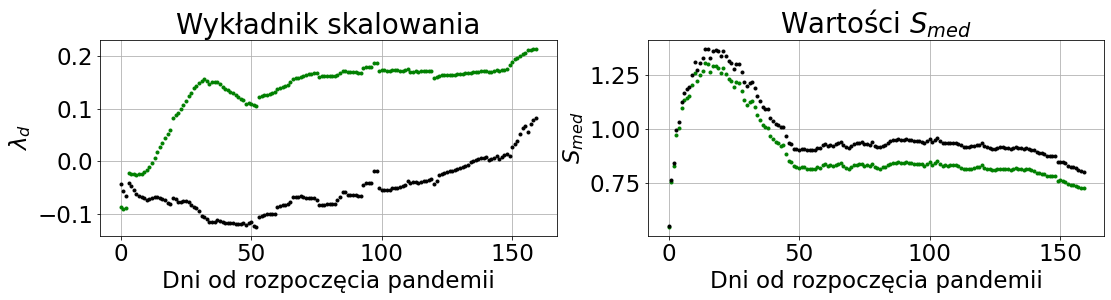

In [40]:
#Wykres wykładnika skalowania dla liczby całkowitych śmierci w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, zgony, dane ze wszystkich powiatów

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 23})

days_num = 160

wykladniki1 = []
wartosci_S_med1 = []
wykladniki2 = []
wartosci_S_med2 = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    a1, b1, S_med1 = fit_pow(x, y)
    a2, b2, a_err, R2, p, S, S_div, S_med2 = fit_loglog_statsmodels(x, y)
    
    wykladniki1.append(a1)
    wartosci_S_med1.append(S_med1)
    wykladniki2.append(a2)
    wartosci_S_med2.append(S_med2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki1, 'go', markersize=3, label='a')
ax[0].plot(range(days_num), wykladniki2, 'o', markersize=3, color ='black', label='b')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_d$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_med1, 'go', markersize=3, label='S_med')
ax[1].plot(range(days_num), wartosci_S_med2, 'o', markersize=3, color ='black', label='S_med2')
ax[1].title.set_text('Wartości $S_{med}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{med}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

#plt.savefig("dead_1wave_pop.pdf")

0.4520044475323058


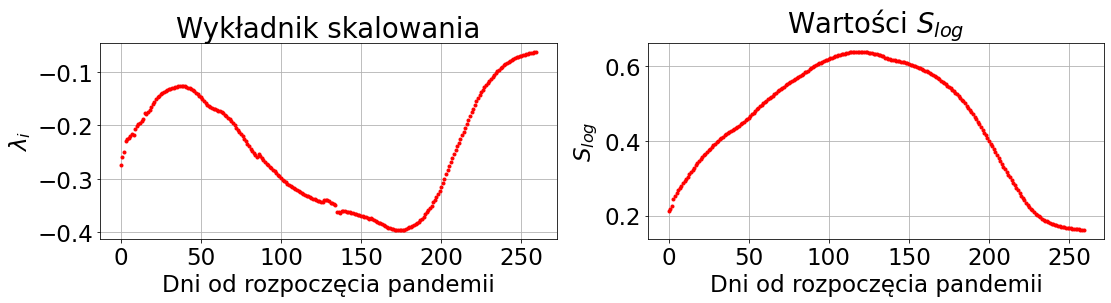

In [93]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość populacji, infekcje, dane ze wszystkich powiatów

days_num = 260

wykladniki = []
wartosci_S_log = []

for i in range(days_num):
    
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean'] / infections.loc[infections['pandemic_day'] == i, 'population']
    
    a, b, a_err, R2, p, S, S_div, S_log = fit_loglog_statsmodels_nans_fix_new(x, y)
    
    wykladniki.append(a)
    wartosci_S_log.append(S_log)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki, 'ro', markersize=3, label='a')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_i$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_log, 'ro', markersize=3, label='S_log')
ax[1].title.set_text('Wartości $S_{log}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{log}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

print(np.mean(wartosci_S_log))
#plt.savefig("inf_1wave_dens.pdf")

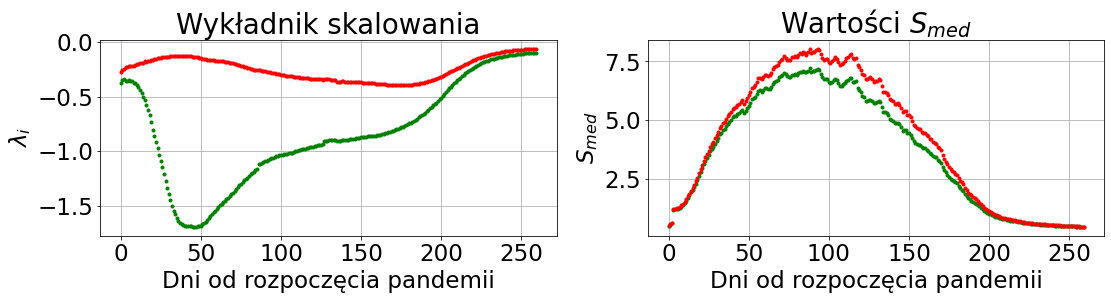

In [42]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość populacji, infekcje, dane ze wszystkich powiatów

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 23})

days_num = 260

wykladniki1 = []
wartosci_S_med1 = []
wykladniki2 = []
wartosci_S_med2 = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean'] / infections.loc[infections['pandemic_day'] == i, 'population']
    a1, b1, S_med1 = fit_pow(x, y)
    a2, b2, a_err, R2, p, S, S_div, S_med2 = fit_loglog_statsmodels(x, y)
    
    wykladniki1.append(a1)
    wartosci_S_med1.append(S_med1)
    wykladniki2.append(a2)
    wartosci_S_med2.append(S_med2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki1, 'go', markersize=3, label='a')
ax[0].plot(range(days_num), wykladniki2, 'ro', markersize=3, label='b')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_i$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_med1, 'go', markersize=3, label='S_med')
ax[1].plot(range(days_num), wartosci_S_med2, 'ro', markersize=3, label='S_med2')
ax[1].title.set_text('Wartości $S_{med}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{med}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

#plt.savefig("inf_1wave_dens.pdf")

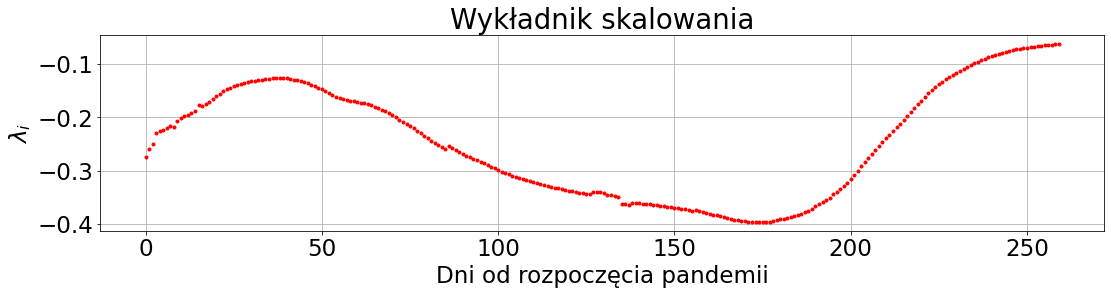

In [43]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość populacji, infekcje, dane ze wszystkich powiatów

days_num = 260

wykladniki = []
wartosci_S_med = []

for i in range(days_num):
    
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean'] / infections.loc[infections['pandemic_day'] == i, 'population']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax.plot(range(days_num), wykladniki, 'ro', markersize=3, label='a')
ax.title.set_text('Wykładnik skalowania')
ax.set_xlabel('Dni od rozpoczęcia pandemii')
ax.set_ylabel('$\lambda_i$')
ax.grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
# ax[1].plot(range(days_num), wartosci_S_med, 'ro', markersize=3, label='S_med')
# ax[1].title.set_text('Wartości $S_{med}$')
# ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
# ax[1].set_ylabel('$S_{med}$')
# ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

#plt.savefig("inf_1wave_dens.pdf")

0.4816520517710726


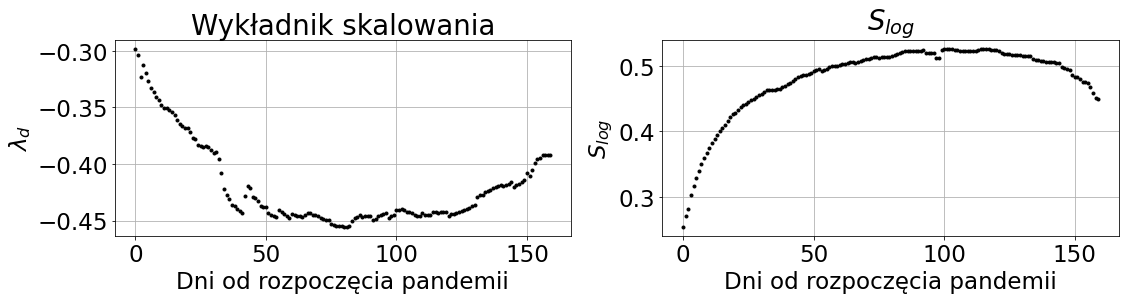

In [94]:
#Wykres wykładnika skalowania dla liczby całkowitych zgonów w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość populacji, śmierci, dane ze wszystkich powiatów

days_num = 160

wykladniki = []
wartosci_S_log = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == i, 'population']
    a, b, a_err, R2, p, S, S_div, S_log = fit_loglog_statsmodels_nans_fix_new(x, y)
    
    wykladniki.append(a)
    wartosci_S_log.append(S_log)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki, 'o', markersize=3, color = 'black', label='a')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_d$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_log, 'o', markersize=3, color = 'black', label='S_log')
ax[1].title.set_text('$S_{log}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{log}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

print(np.mean(wartosci_S_log))
#plt.savefig("dead_1wave_dens.pdf")

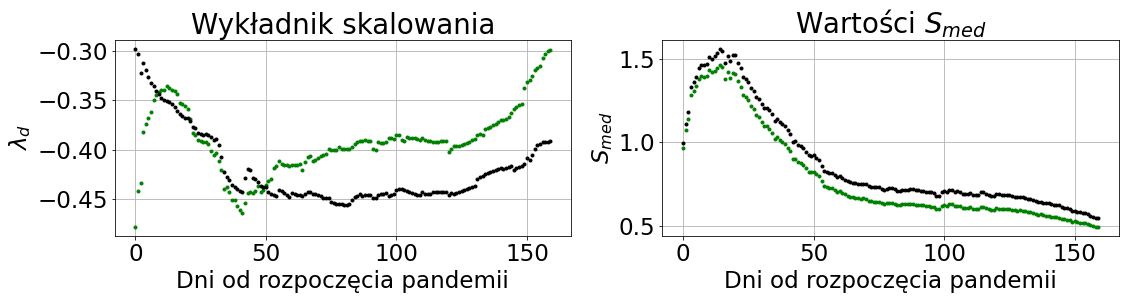

In [45]:
#Wykres wykładnika skalowania dla liczby całkowitych zgonów w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość populacji, śmierci, dane ze wszystkich powiatów

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 23})

days_num = 160

wykladniki1 = []
wartosci_S_med1 = []
wykladniki2 = []
wartosci_S_med2 = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == i, 'population']
    a1, b1, S_med1 = fit_pow(x, y)
    a2, b2, a_err, R2, p, S, S_div, S_med2 = fit_loglog_statsmodels(x, y)
    
    wykladniki1.append(a1)
    wartosci_S_med1.append(S_med1)
    wykladniki2.append(a2)
    wartosci_S_med2.append(S_med2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0].plot(range(days_num), wykladniki1, 'go', markersize=3, label='a')
ax[0].plot(range(days_num), wykladniki2, 'o', markersize=3, color ='black', label='b')
ax[0].title.set_text('Wykładnik skalowania')
ax[0].set_xlabel('Dni od rozpoczęcia pandemii')
ax[0].set_ylabel('$\lambda_d$')
ax[0].grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
ax[1].plot(range(days_num), wartosci_S_med1, 'go', markersize=3, label='S_med')
ax[1].plot(range(days_num), wartosci_S_med2, 'o', markersize=3, color ='black', label='S_med2')
ax[1].title.set_text('Wartości $S_{med}$')
ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
ax[1].set_ylabel('$S_{med}$')
ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

#plt.savefig("dead_1wave_dens.pdf")

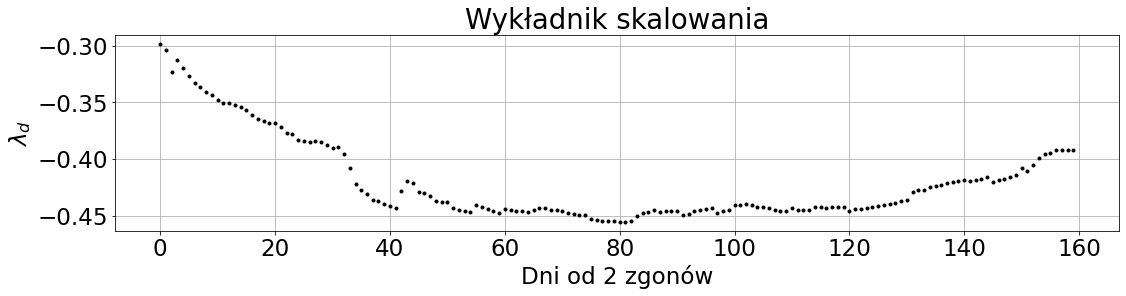

In [46]:
#Wykres wykładnika skalowania dla liczby całkowitych zgonów w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość populacji, śmierci, dane ze wszystkich powiatów

days_num = 160

wykladniki = []
wartosci_S_med = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean'] / deaths.loc[deaths['pandemic_day'] == i, 'population']
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
#fig.subplots_adjust(left=0.2, hspace = 0.4)
ax.plot(range(days_num), wykladniki, 'o', markersize=3, color = 'black', label='a')
ax.title.set_text('Wykładnik skalowania')
ax.set_xlabel('Dni od 2 zgonów')
ax.set_ylabel('$\lambda_d$')
ax.grid(visible = True)
#ax[0].set_ylim([-0.1, 1.2])
# ax[1].plot(range(days_num), wartosci_S_med, 'o', markersize=3, color = 'black', label='S_med')
# ax[1].title.set_text('$S_{med}$')
# ax[1].set_xlabel('Dni od rozpoczęcia pandemii')
# ax[1].set_ylabel('$S_{med}$')
# ax[1].grid(visible = True)
plt.subplots_adjust(bottom=0.2)

#plt.savefig("dead_1wave_dens.pdf")

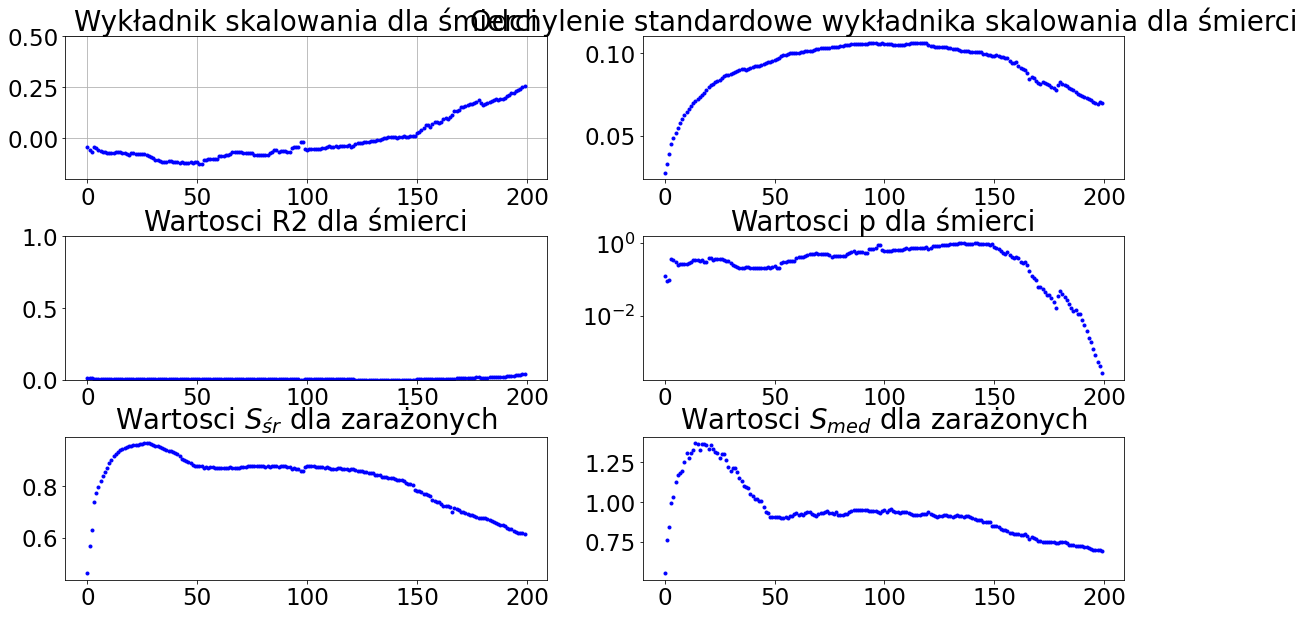

In [47]:
#Wykres wykładnika skalowania dla liczby całkowitych śmierci w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, śmierci, dane ze wszystkich powiatów

days_num = 200
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,0].grid(visible = True)
ax[0,0].set_ylim([-0.2, 0.5])
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla śmierci')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla śmierci')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

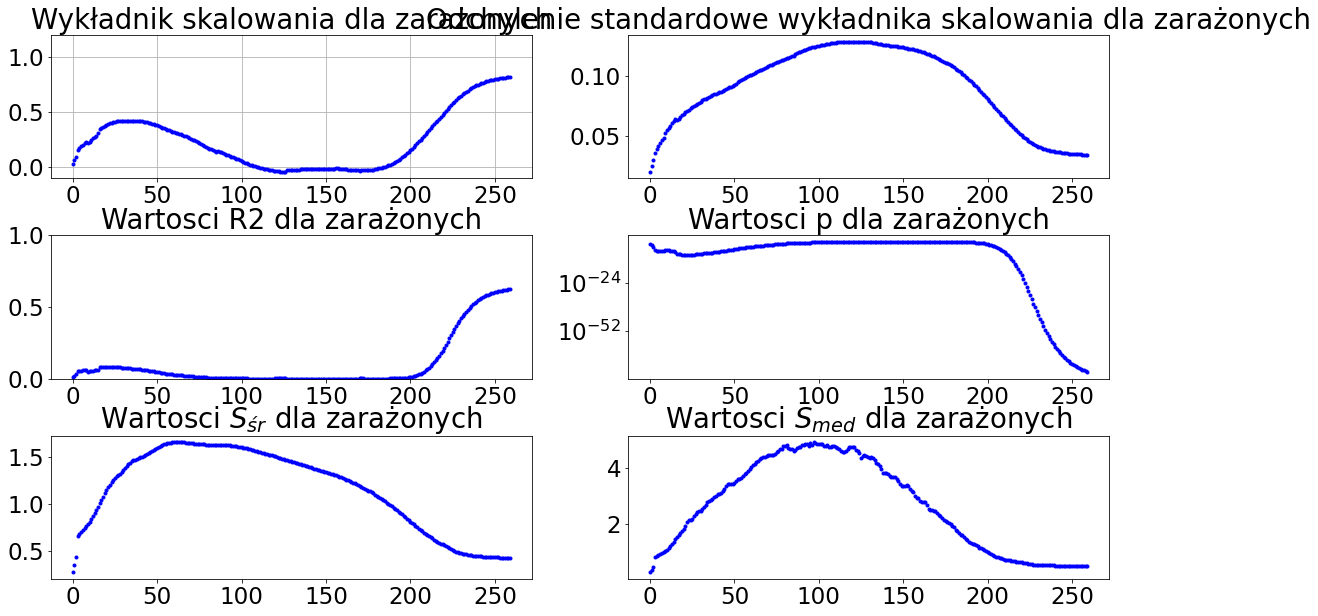

In [48]:
#Wykres wykładnika skalowania dla liczby całkowitych przypadków w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, populacja, infekcje, dane ze wszystkich powiatów

days_num = 260
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'population']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,0].grid(visible = True)
ax[0,0].set_ylim([-0.1, 1.2])
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla zarażonych')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla zarażonych')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

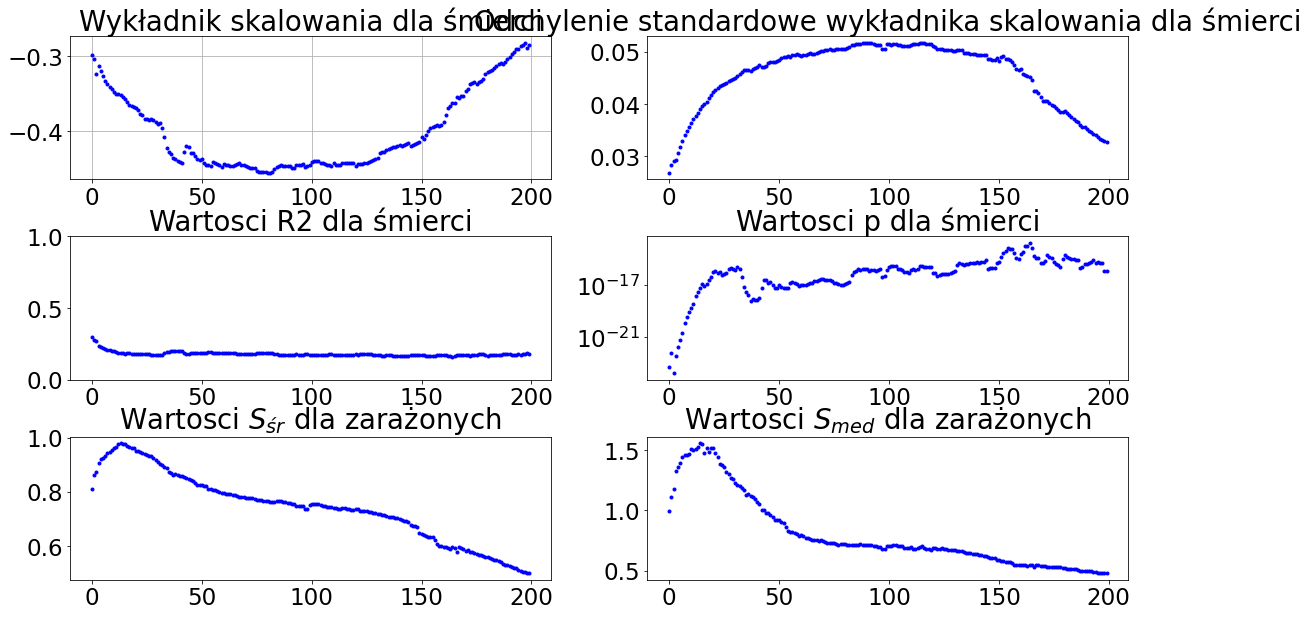

In [49]:
#Wykres wykładnika skalowania dla liczby śmierci per capita w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość zaludnienia, śmierci per capita, dane ze wszystkich powiatów

days_num = 200
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    popul = deaths.loc[deaths['pandemic_day'] == i, 'population']
    y = y/popul
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci') # może lepiej nie nazywać tego wykładnikiem skalowania
ax[0,0].grid(visible = True)
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla śmierci')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla śmierci')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

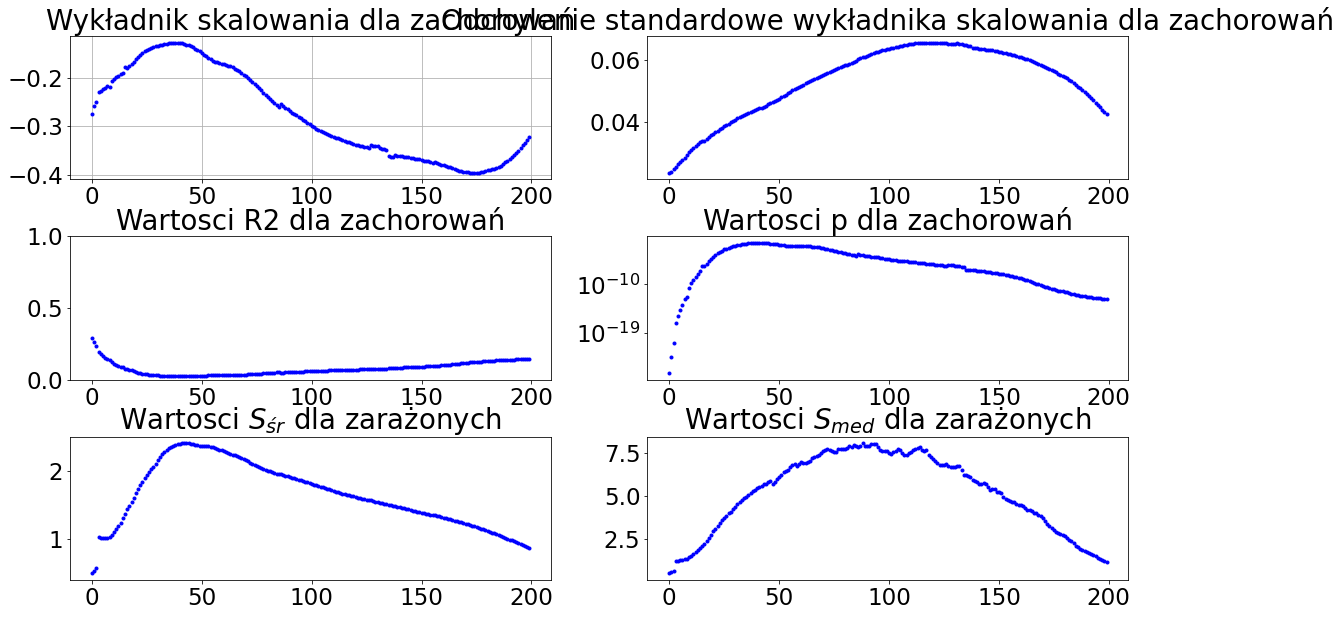

In [50]:
#Wykres wykładnika skalowania dla liczby zachorowań per capita w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania
#wykres log-log, gęstość zaludnienia, infekcje per capita, dane ze wszystkich powiatów

days_num = 200
wykladniki = []
wykladniki_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    popul = infections.loc[infections['pandemic_day'] == i, 'population']
    y = y/popul
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_loglog_statsmodels(x, y)
    
    wykladniki.append(a)
    wykladniki_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zachorowań') # może lepiej nie nazywać tego wykładnikiem skalowania
ax[0,0].grid(visible = True)
ax[0,1].plot(range(days_num), wykladniki_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe wykładnika skalowania dla zachorowań')
ax[0,1].ticklabel_format(style='plain')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zachorowań')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zachorowań')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

# ax[2,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
# ax[2,0].title.set_text('Wartosci S dla zachorowań')
# ax[2,0].set_position([0.392,0.132,0.318,0.2])
# ax[2,1].set_visible(False)

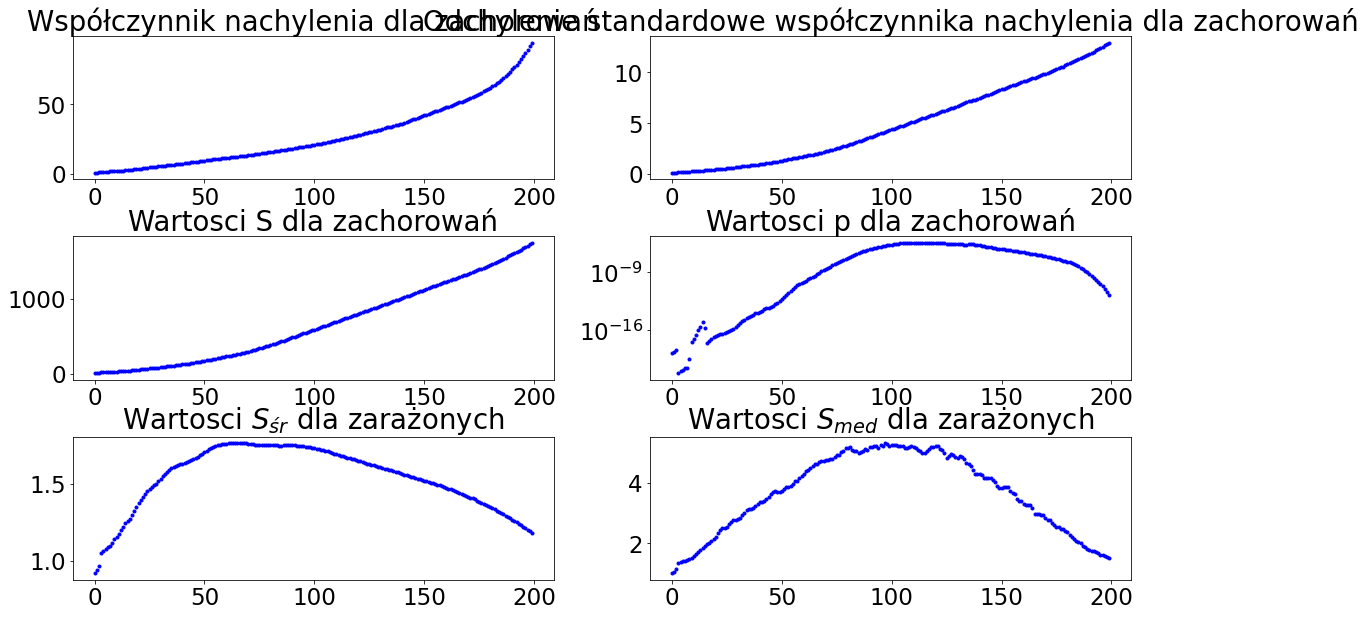

In [51]:
#Wykres nachylenia prostej dla przypadków i w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (lin-lin)

days_num = 200
nachylenia = []
nachylenia_err = []
wartosci_R2 = []
wartosci_p = []
wartosci_S = []
wartosci_S_div = []
wartosci_S_med = []

for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    
    a, b, a_err, R2, p, S, S_div, S_med = fit_linlin_statsmodels(x, y)
    
    nachylenia.append(a)
    nachylenia_err.append(a_err)
    wartosci_R2.append(R2)
    wartosci_p.append(p)
    wartosci_S.append(S)
    wartosci_S_div.append(S_div)
    wartosci_S_med.append(S_med)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
fig.subplots_adjust(left=0.2, hspace = 0.4)
ax[0,0].plot(range(days_num), nachylenia, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Współczynnik nachylenia dla zachorowań')
ax[0,1].plot(range(days_num), nachylenia_err, 'bo', markersize=3, label='a_err')
ax[0,1].title.set_text('Odchylenie standardowe współczynnika nachylenia dla zachorowań')
# ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
# ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
# ax[1,0].set_ylim([0, 1])
ax[1,0].plot(range(days_num), wartosci_S, 'bo', markersize=3, label='S')
ax[1,0].title.set_text('Wartosci S dla zachorowań')
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zachorowań')
ax[1,1].set_yscale("log")
ax[2,0].plot(range(days_num), wartosci_S_div, 'bo', markersize=3, label='S_śr')
ax[2,0].title.set_text('Wartosci $S_{śr}$ dla zarażonych')
ax[2,1].plot(range(days_num), wartosci_S_med, 'bo', markersize=3, label='S_med')
ax[2,1].title.set_text('Wartosci $S_{med}$ dla zarażonych')

In [52]:
print_full(infections.loc[infections.district == "chełmski"])

            date   province  district  infected_total  population  area_ha  \
40231 2020-03-04  lubelskie  chełmski        0.000000       78014   188560   
40232 2020-03-05  lubelskie  chełmski        0.000000       78014   188560   
40233 2020-03-06  lubelskie  chełmski        0.000000       78014   188560   
40234 2020-03-07  lubelskie  chełmski        0.000000       78014   188560   
40235 2020-03-08  lubelskie  chełmski        0.000000       78014   188560   
40236 2020-03-09  lubelskie  chełmski        0.000000       78014   188560   
40237 2020-03-10  lubelskie  chełmski        0.000000       78014   188560   
40238 2020-03-11  lubelskie  chełmski        0.000000       78014   188560   
40239 2020-03-12  lubelskie  chełmski        0.000000       78014   188560   
40240 2020-03-13  lubelskie  chełmski        0.000000       78014   188560   
40241 2020-03-14  lubelskie  chełmski        0.000000       78014   188560   
40242 2020-03-15  lubelskie  chełmski        0.000000       7801

In [53]:
#Wykres wykładnika skalowania dla przypadków i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (log-log)

days_num = 200
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = infections.loc[infections['pandemic_day'] == i, 'density_ppl_per_ha']
    y = infections.loc[infections['pandemic_day'] == i, 'infected_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_statsmodels(x, y)
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla zarażonych')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla zarażonych')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla zarażonych')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla zarażonych')
ax[1,1].set_yscale("log")



ValueError: too many values to unpack (expected 4)

In [ ]:
#Wykres wykładnika skalowania dla śmierci i (nachylenia prostej) w zależności od kolejnych dni pandemicznych
#+ wykresy jakości dopasowania (dla zależności od gęstości populacji) (log-log)

days_num = 200
wykladniki = []
wartosci_R2 = []
wartosci_p = []
wartosci_b = []
for i in range(days_num):
    x = deaths.loc[deaths['pandemic_day'] == i, 'density_ppl_per_ha']
    y = deaths.loc[deaths['pandemic_day'] == i, 'dead_mean']
    #a = fit_loglog(x, y)
    a, b, r, p = fit_loglog_statsmodels(x, y)
    return results.params[1], results.params[0], results.bse[1], results.rsquared, results.pvalues[0], S
    wykladniki.append(a)
    wartosci_b.append(b)
    wartosci_R2.append(r*r)
    wartosci_p.append(p)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))
fig.subplots_adjust(left=0.2, hspace = 0.3)
ax[0,0].plot(range(days_num), wykladniki, 'bo', markersize=3, label='a')
ax[0,0].title.set_text('Wykładnik skalowania dla śmierci')
ax[0,1].plot(range(days_num), wartosci_b, 'bo', markersize=3, label='b')
ax[0,1].title.set_text('Wartosci b dla śmierci')
ax[1,0].plot(range(days_num), wartosci_R2, 'bo', markersize=3, label='R2')
ax[1,0].title.set_text('Wartosci R2 dla śmierci')
ax[1,0].set_ylim([0, 1])
ax[1,1].plot(range(days_num), wartosci_p, 'bo', markersize=3, label='p')
ax[1,1].title.set_text('Wartosci p dla śmierci')
ax[1,1].set_yscale("log")



In [ ]:
#100. dzień pandemii - średnia data

print(mean_date_from_pandemic_day(day_0_date_mean, 200))
print(day_0_date_mean)


In [ ]:
#Wykres całkowitej liczby przypadków per capita od populacji dla wybranego dnia pandemii

# x = infections.loc[infections['pandemic_day'] == 200, 'population']
# y = infections.loc[infections['pandemic_day'] == 200, 'infected_total']

# y = y / x
# plt.plot(x, y, 'bo')
# plt.title("200 dni od 2 przypadków")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zakażeń per capita')

In [ ]:
#Wykres całkowitej liczby śmierci per capita od populacji dla pierwszego dnia pandemii

# x = deaths.loc[deaths['pandemic_day'] == 200, 'population']
# y = deaths.loc[deaths['pandemic_day'] == 200, 'dead_total']

# y = y / x
# plt.plot(x, y, 'bo')
# plt.title("200 dni od 2 przypadków")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel('Populacja')
# plt.ylabel('Liczba zgonów per capita')